In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from helper import *

In [8]:
dirs = [d for d in os.listdir() if d.startswith('outdir_') if '.' not in d if 'class' not in d]

classes = [d for d in os.listdir() if d.startswith('outdir_') if '.' not in d if 'class' in d]
dirs.sort()
classes.sort()

In [54]:
def make_frame(t):
    for i in range(len(ax)):
        ax[i].clear()
    # the varying weights make the points appear one after the other
    if len(files)>1:

        f = files[int(t)]
        with open(d + '/' + f,"rb") as pickle_in:
            trace_a, trace_b, trace_x, trace_f1,trace_f2, trace_beta = pickle.load(pickle_in)
        with open(class_file,"rb") as spl_in:
            spl = pickle.load(spl_in)

        use_mm = not (trace_b[0][0] == 1).all()
#         lab = d.split('_')[3]

        x = trace_x[-1]
        num_bugs = x[0].shape[1]
        trf1 = np.reshape(trace_f1[-1][0], (x[0].shape[0]-1, x[0].shape[1]), order = 'F')
        trf2 = np.reshape(trace_f2[-1][0], (x[0].shape[0]-1, x[0].shape[1]), order = 'F')
        for i in range(num_bugs):
            ax[i].plot(x[0][1:,i], label = 'x')
            ax[i].plot(spl.states[1:,i,0], label = 'True x')
            ax[i].plot(trf1[:,i], label = 'f1')
            if d.split('_')[-1] == 'True':
                ax[i].plot(trf2[:,i], label = 'f2')
            ax[i].legend()
            ax[i].set_title('Bug ' + str(i)+', step ' + f.split('_')[-1])
            ax[i].set_xlabel('Time (ms)')
            ax[i].set_ylim([min(spl.states[1:,i,0])-1,max(spl.states[1:,i,0])+1])

        return mplfig_to_npimage(fig)

t:   2%|▏         | 2/99 [00:00<00:08, 10.79it/s, now=None]

MoviePy - Building file testoutdir_new_opt_competing2_MM0_useF1_False.gif with imageio.



t:   0%|          | 0/99 [00:00<?, ?it/s, now=None]

MoviePy - Building file testoutdir_new_opt_competing2_MM0_useF1_True.gif with imageio.



t:   2%|▏         | 2/99 [00:00<00:08, 11.12it/s, now=None]

MoviePy - Building file testoutdir_new_opt_competing2_MM1_useF1_False.gif with imageio.



t:   0%|          | 0/99 [00:00<?, ?it/s, now=None]


MoviePy - Building file testoutdir_new_opt_competing2_MM1_useF1_True.gif with imageio.


t:   0%|          | 0/99 [00:00<?, ?it/s, now=None]

MoviePy - Building file testoutdir_new_opt_competing3a_MM0_useF1_False.gif with imageio.



t:   0%|          | 0/99 [00:00<?, ?it/s, now=None]

MoviePy - Building file testoutdir_new_opt_competing3a_MM0_useF1_True.gif with imageio.



t:   0%|          | 0/99 [00:00<?, ?it/s, now=None]

MoviePy - Building file testoutdir_new_opt_competing3a_MM1_useF1_False.gif with imageio.



t:   4%|▍         | 2/52 [00:00<00:04, 10.43it/s, now=None]

MoviePy - Building file testoutdir_new_opt_competing3a_MM1_useF1_True.gif with imageio.



t:   0%|          | 0/99 [00:00<?, ?it/s, now=None]


MoviePy - Building file testoutdir_new_opt_competing3b_MM0_useF1_False.gif with imageio.


t:   0%|          | 0/99 [00:00<?, ?it/s, now=None]

MoviePy - Building file testoutdir_new_opt_competing3b_MM1_useF1_False.gif with imageio.



t:   0%|          | 0/99 [00:00<?, ?it/s, now=None]

MoviePy - Building file testoutdir_new_opt_competing3b_MM1_useF1_True.gif with imageio.



t:   2%|▏         | 2/99 [00:00<00:09, 10.59it/s, now=None]

MoviePy - Building file testoutdir_new_opt_cooperation3_MM1_useF1_False.gif with imageio.



t:   0%|          | 0/99 [00:00<?, ?it/s, now=None]

MoviePy - Building file testoutdir_new_opt_cooperation3_MM1_useF1_True.gif with imageio.



t: 100%|██████████| 99/99 [00:23<00:00,  3.05it/s, now=None]
                                                            

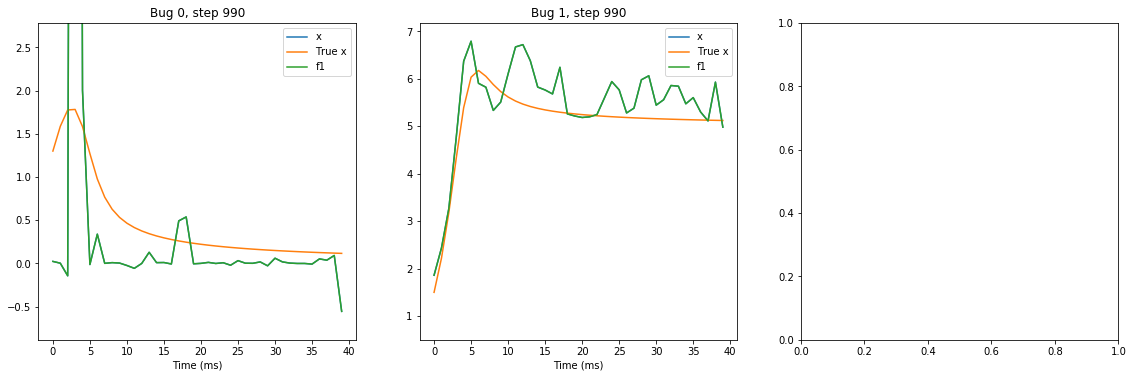

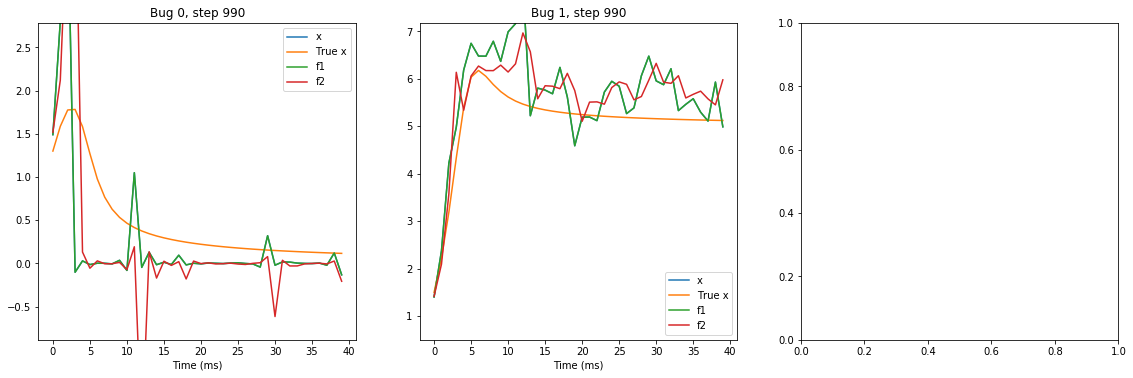

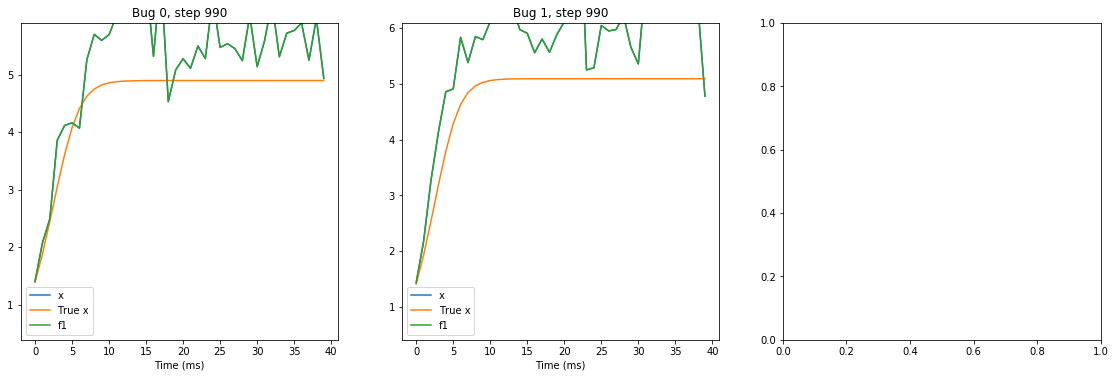

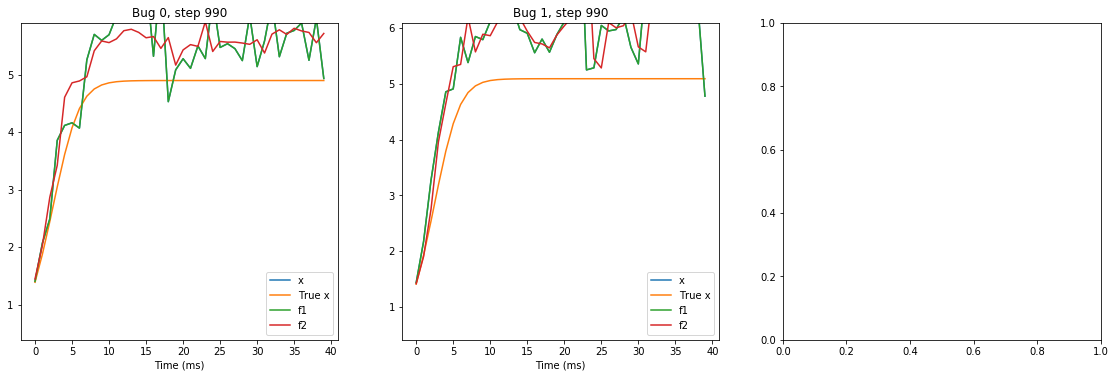

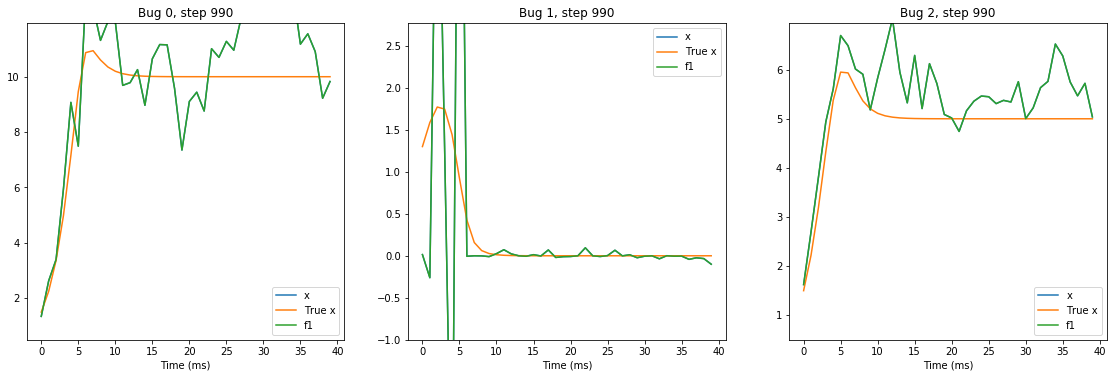

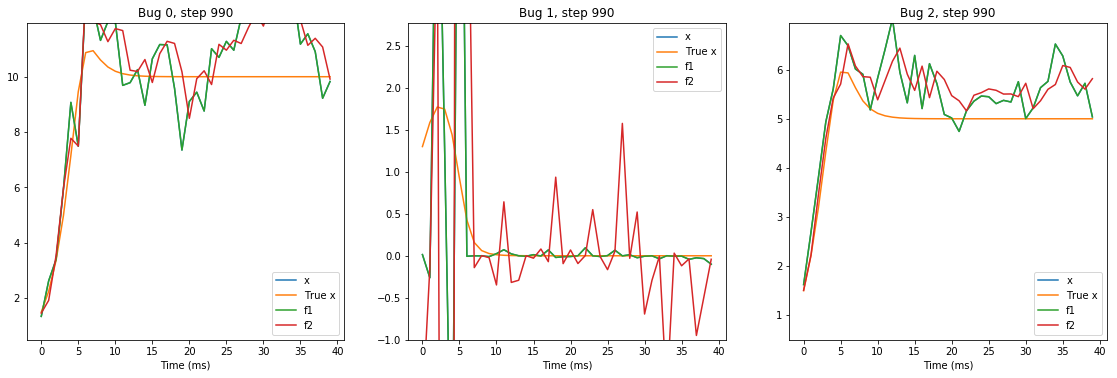

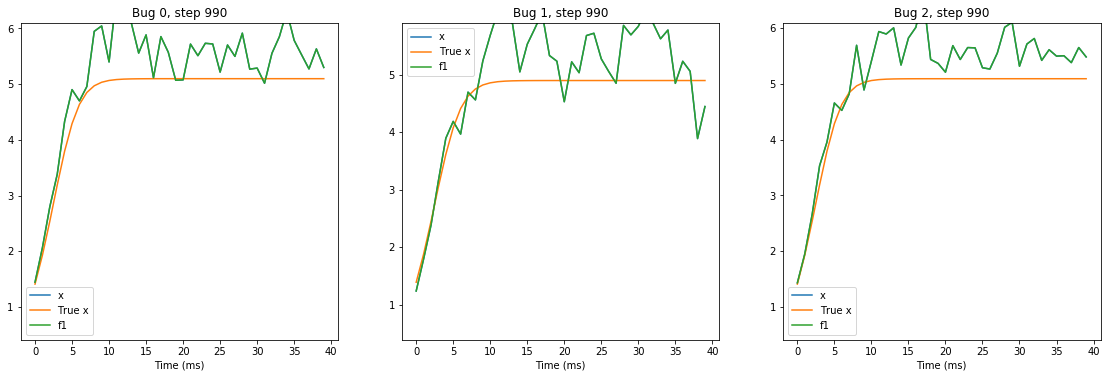

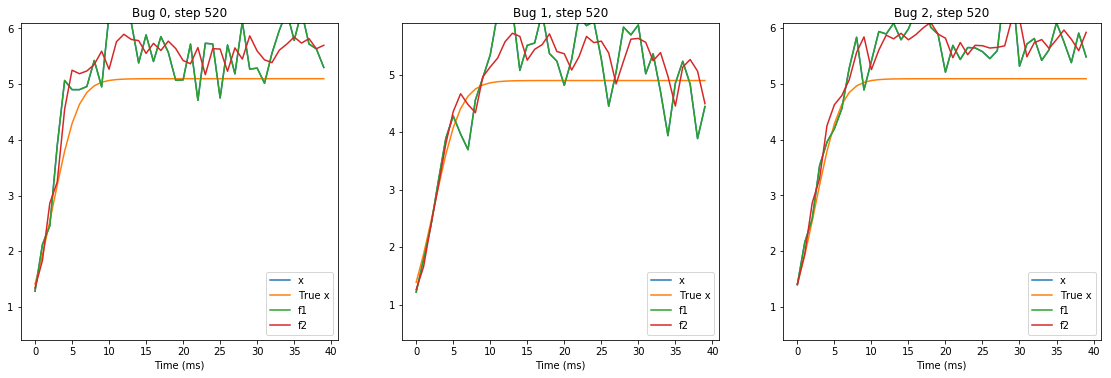

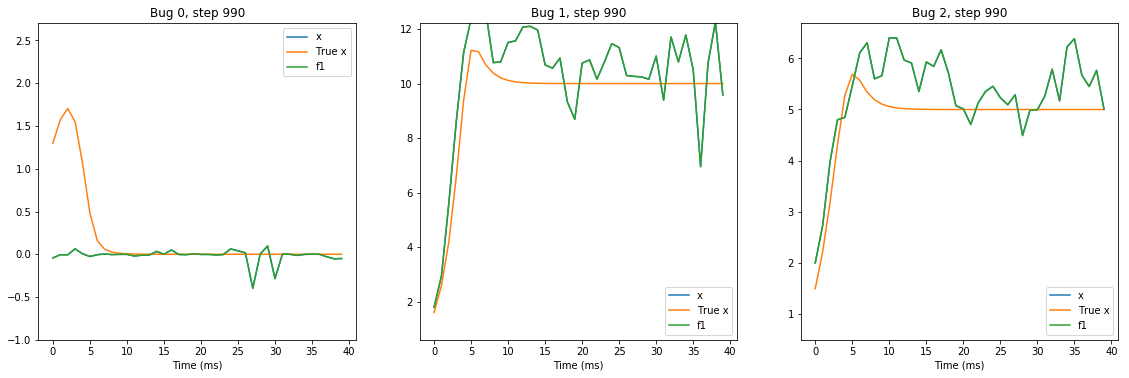

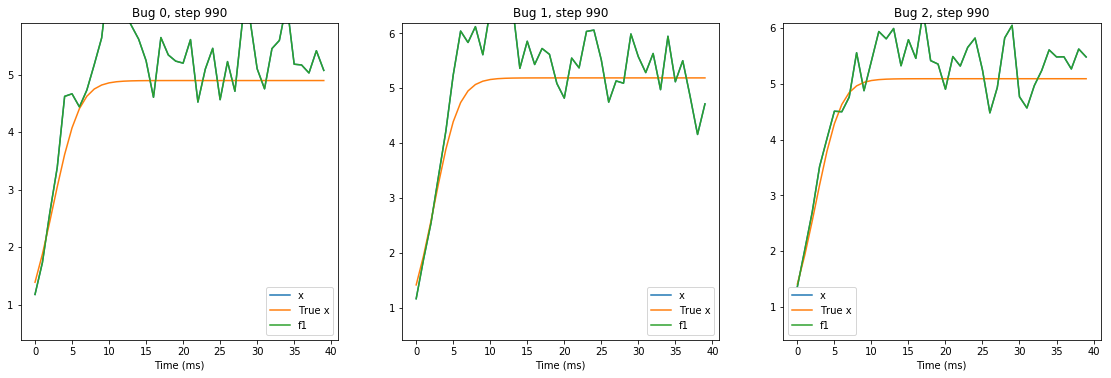

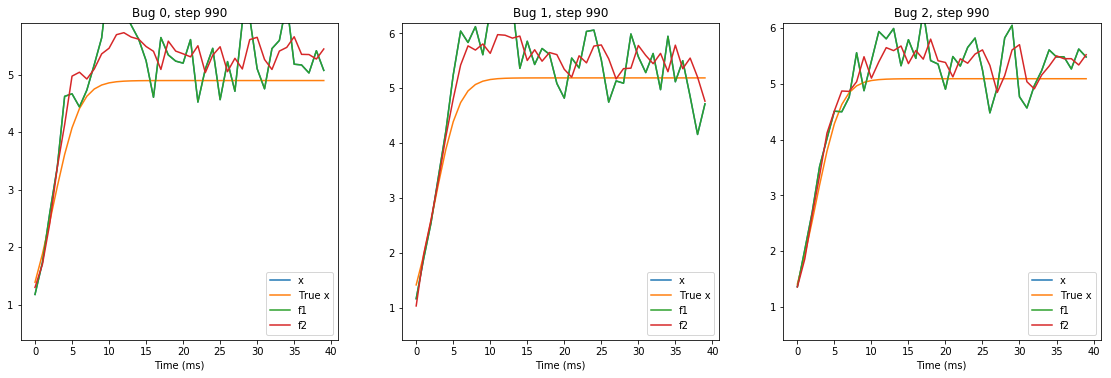

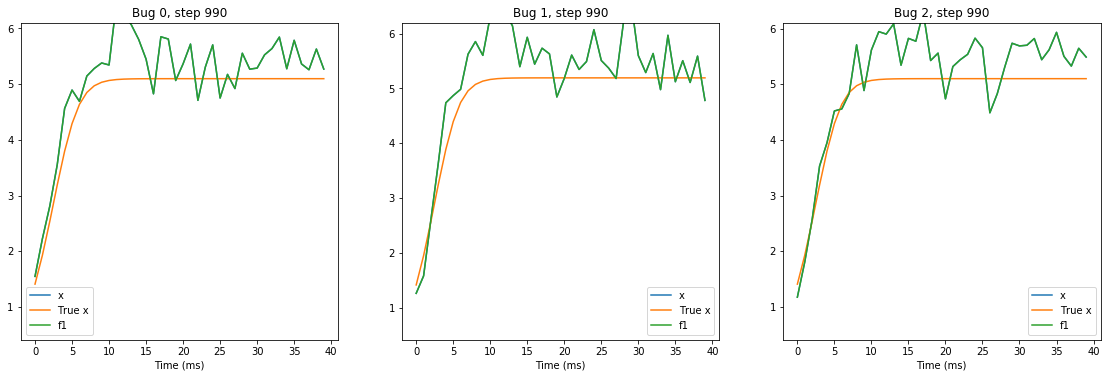

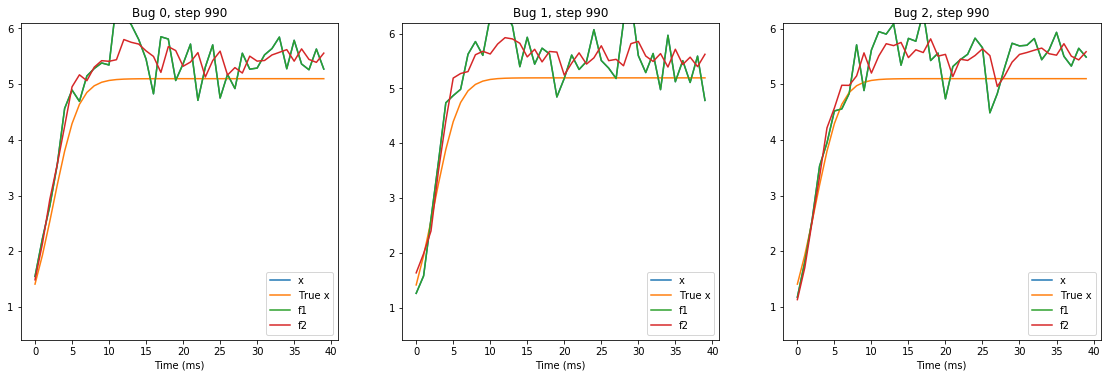

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm # sklearn = scikit-learn
from sklearn.datasets import make_moons
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

for i,d in enumerate(dirs):
    files = [fi for fi in os.listdir(d) if '.png' not in fi]
    files.sort()
    class_file = classes[i]
    if len(files)>1:
        if d.split('_')[2][-1] == '2':
            num_bugs = 2
        else:
            num_bugs = 3
        fig, ax = plt.subplots(1,num_bugs, figsize=(15, 5))
        fig.subplots_adjust(left=0, right=1, bottom=0)
        
        animation = VideoClip(make_frame, duration = len(files))
        animation.write_gif("test" + d + ".gif", fps=1)

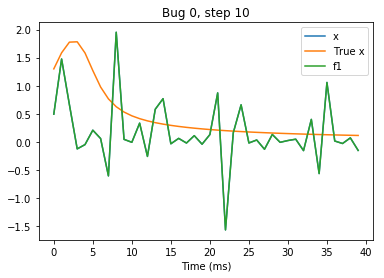

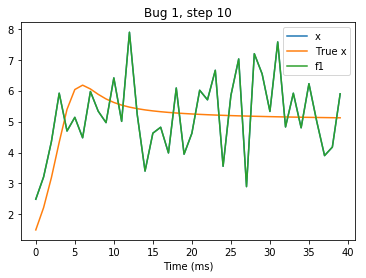

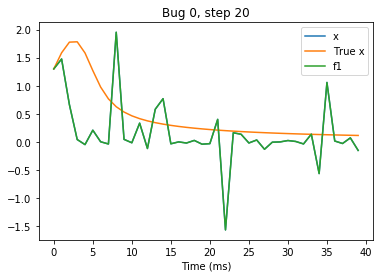

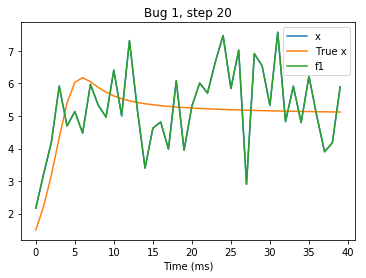

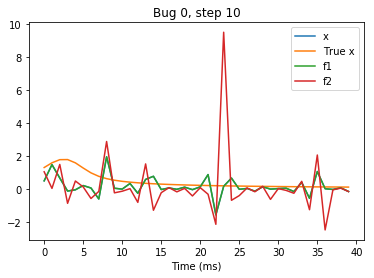

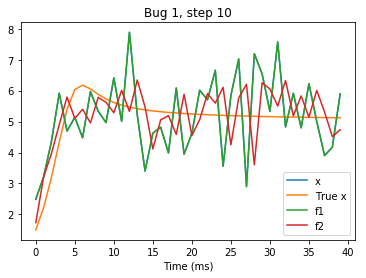

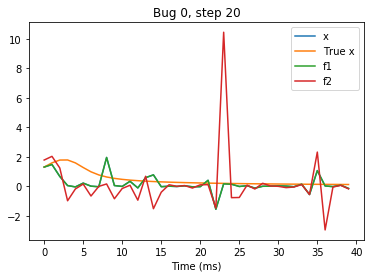

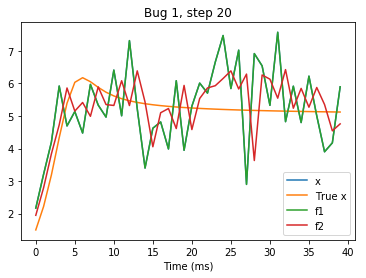

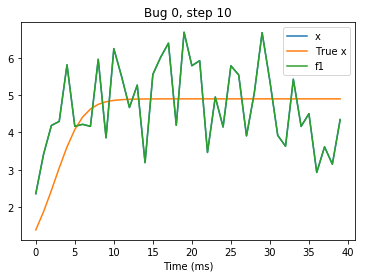

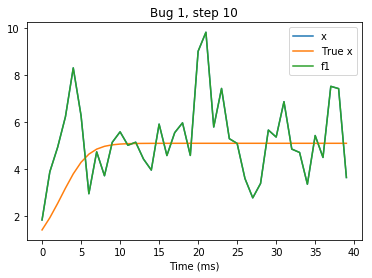

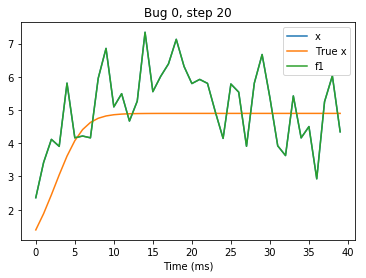

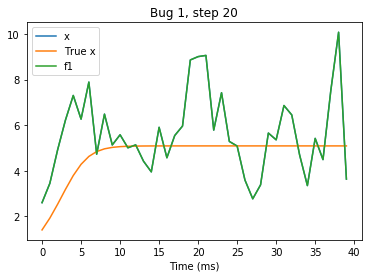

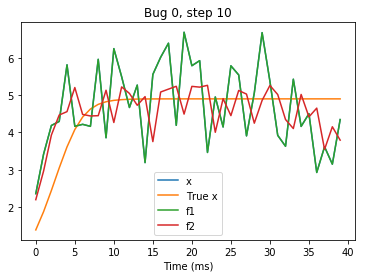

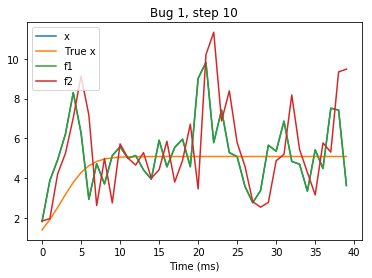

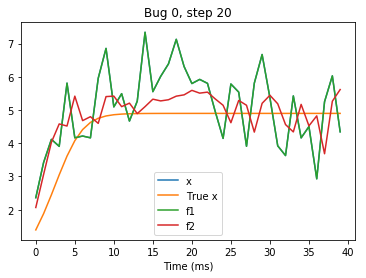

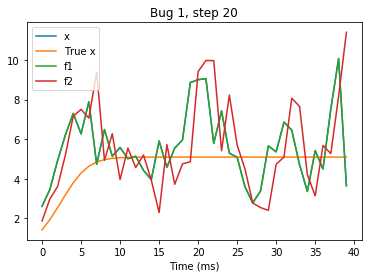

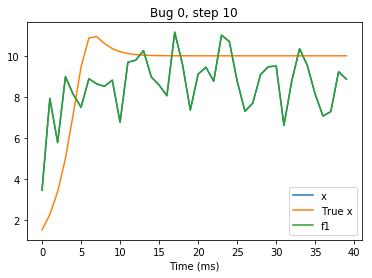

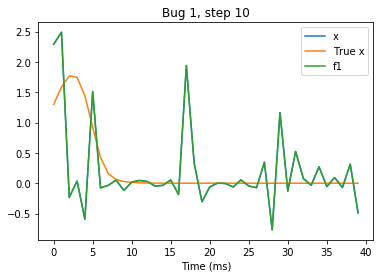

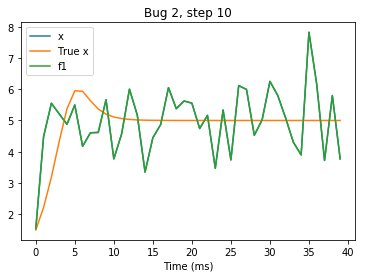

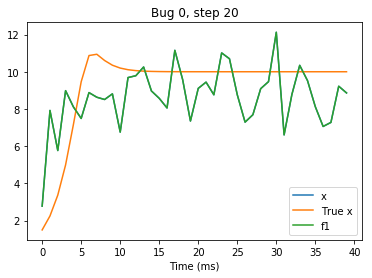

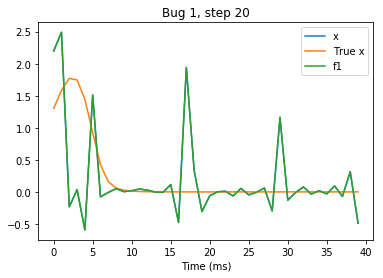

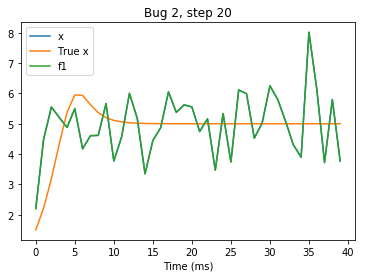

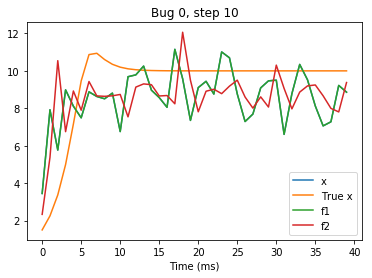

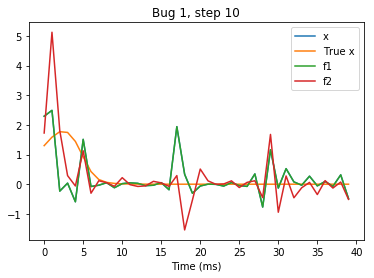

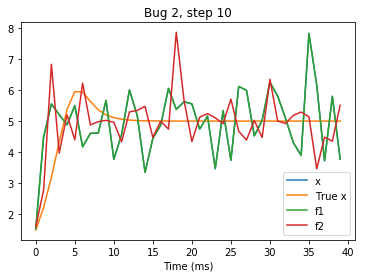

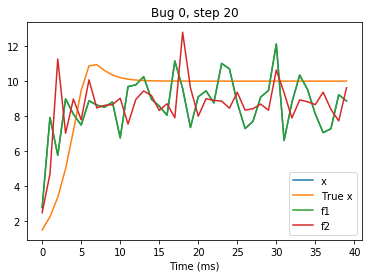

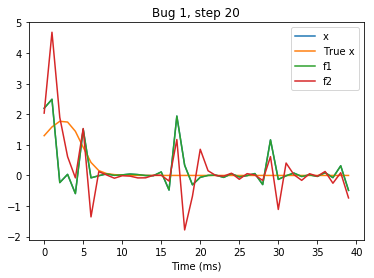

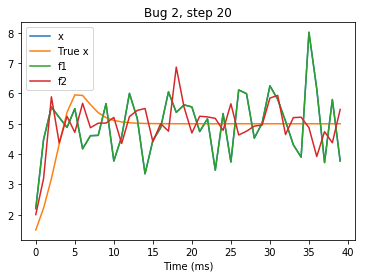

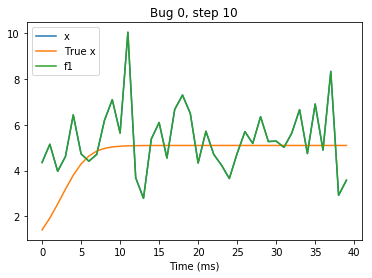

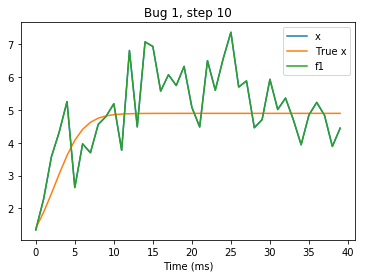

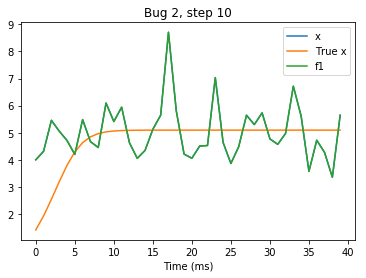

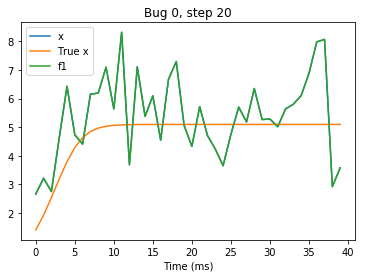

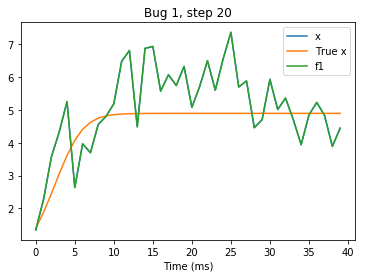

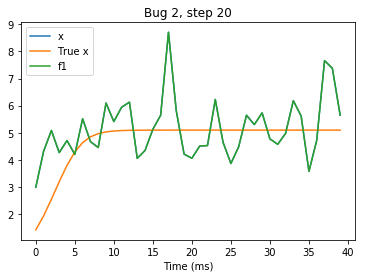

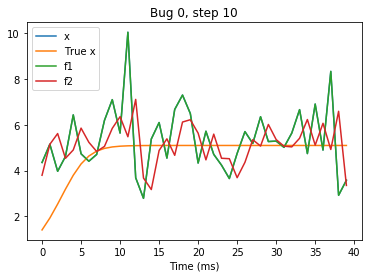

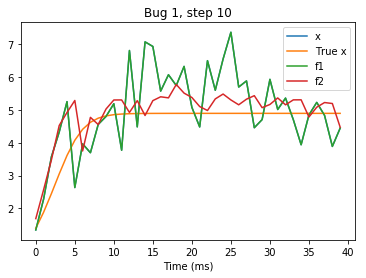

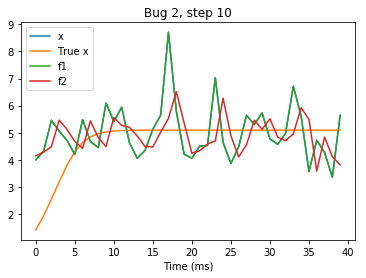

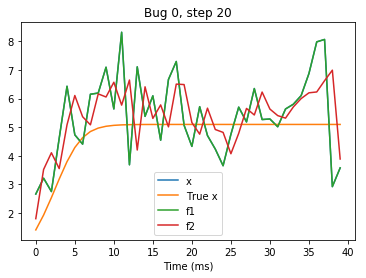

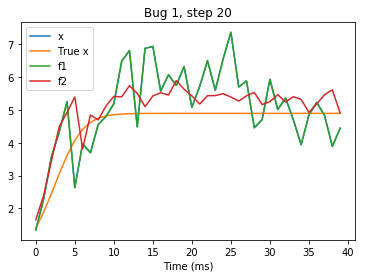

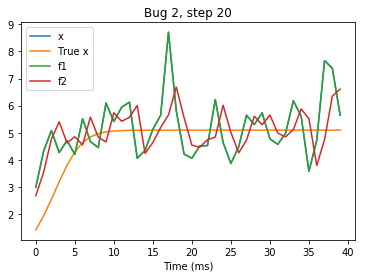

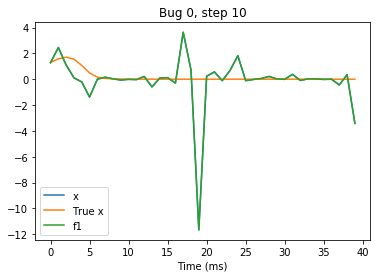

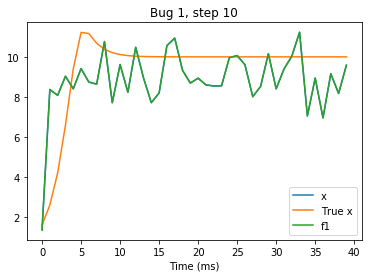

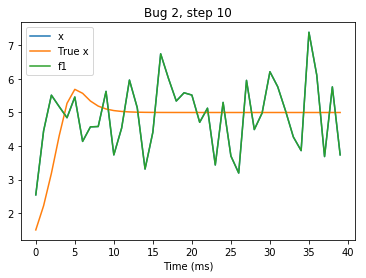

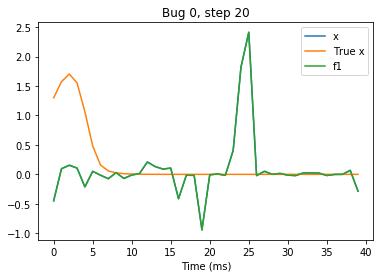

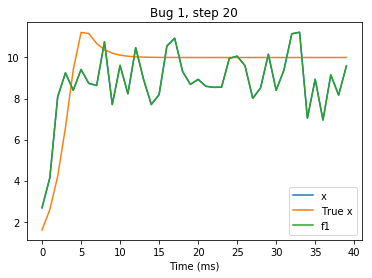

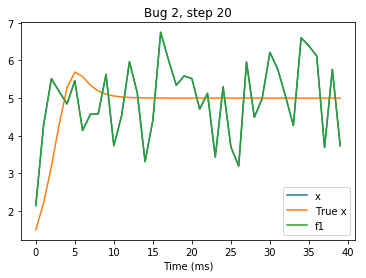

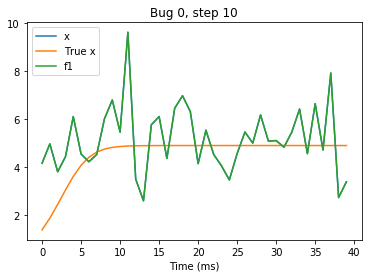

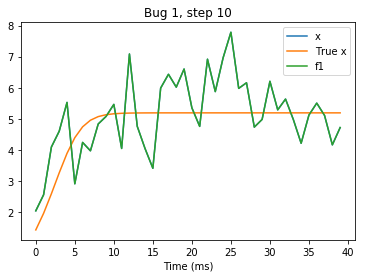

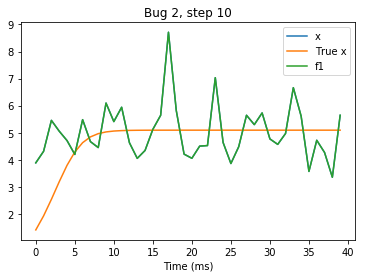

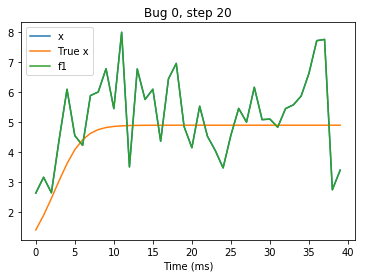

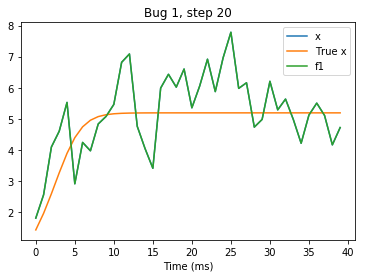

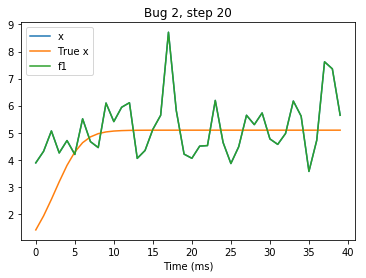

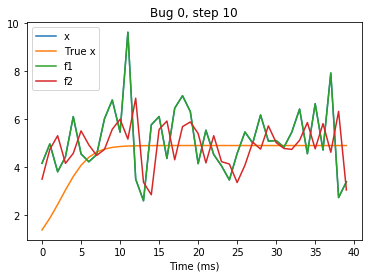

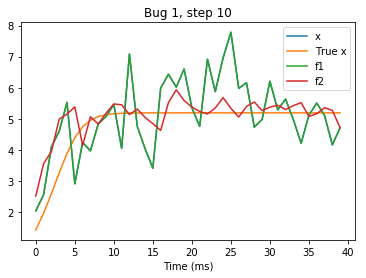

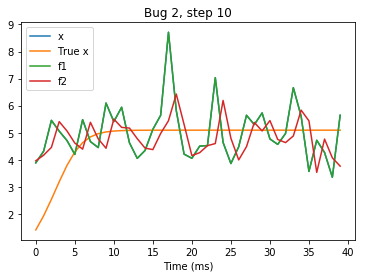

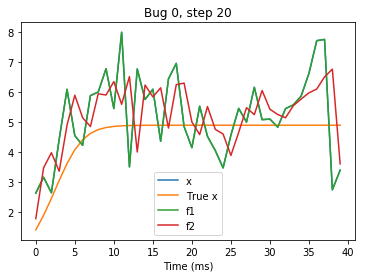

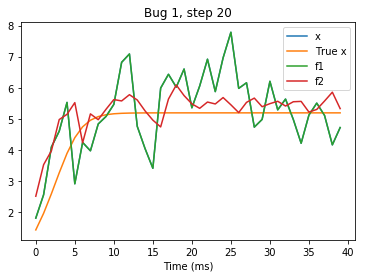

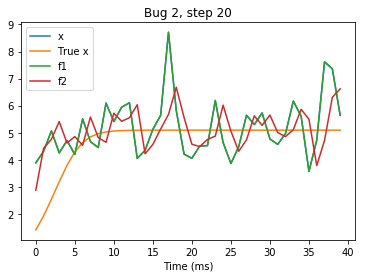

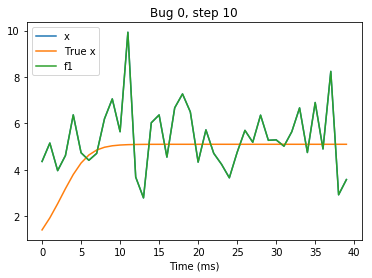

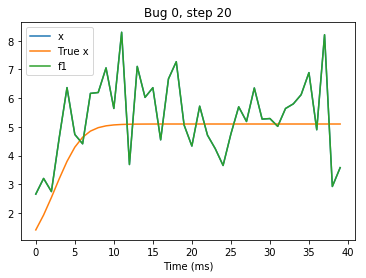

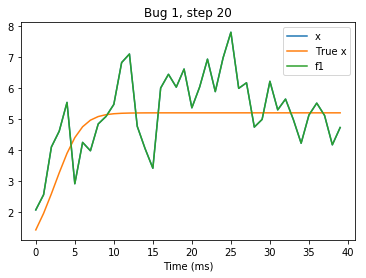

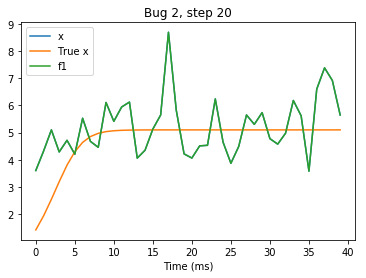

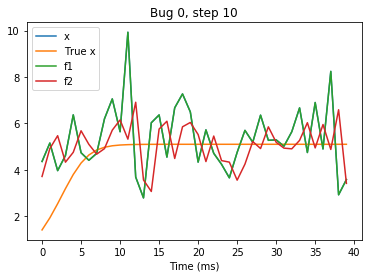

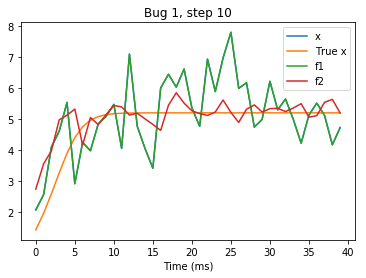

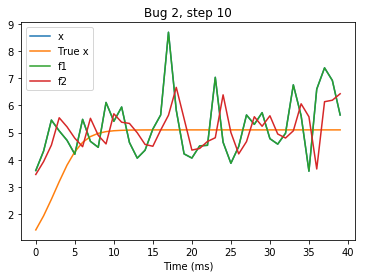

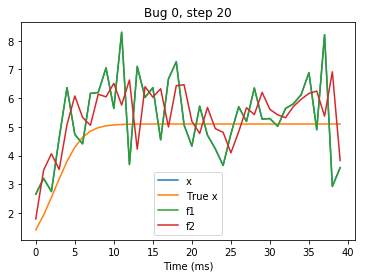

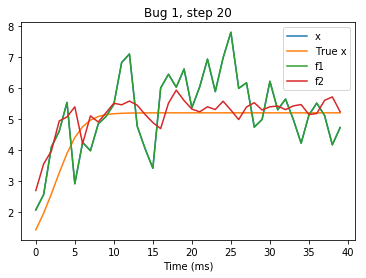

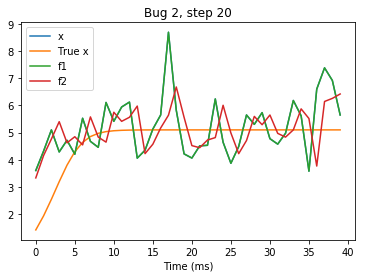

In [56]:
for i,d in enumerate(dirs):
    files = [fi for fi in os.listdir(d) if '.png' not in fi]
    files.sort()
    class_file = classes[i]
    for f in [files[1], files[-1]]:
        with open(d + '/' + f,"rb") as pickle_in:
            trace_a, trace_b, trace_x, trace_f1,trace_f2, trace_beta = pickle.load(pickle_in)
        with open(class_file,"rb") as spl_in:
            spl = pickle.load(spl_in)
            
        use_mm = not (trace_b[0][0] == 1).all()

        num_bugs = trace_a[0][0].shape[0]

        plt.title(dirs[0].split('opt_')[-1] + ', step ' + f.split('_')[-1])
        x = trace_x[-1]
        if len(x)>1:
#         plt.ylim([0,2])
            num_bugs = x[0].shape[1]
            trf1 = np.reshape(trace_f1[-1][0], (x[0].shape[0]-1, x[0].shape[1]), order = 'F')
            trf2 = np.reshape(trace_f2[-1][0], (x[0].shape[0]-1, x[0].shape[1]), order = 'F')
            for i in range(num_bugs):
                plt.plot(x[0][1:,i], label = 'x')
                plt.plot(spl.states[1:,i,0],label = 'True x')
                plt.plot(trf1[:,i], label = 'f1')
                if d.split('_')[-1] == 'True':
                    plt.plot(trf2[:,i], label = 'f2')
                plt.legend()
                plt.title('Bug ' + str(i) + ', step ' + f.split('_')[-1])
                plt.xlabel('Time (ms)')
                plt.savefig(d.split('opt')[-1] + '_bug' + str(i) + '_step' + f.split('_')[-1])
                plt.show()

In [77]:
len(trace_f1)

991

In [76]:
f1_0[0].shape

TypeError: list indices must be integers or slices, not tuple

In [82]:
diff0 = np.mean(np.array([abs(ff1 - ff2) for ff1 in f1_0 for ff2 in f2_0]),0)

In [83]:
diff0.shape

(982081, 80)

In [85]:
d.split('_')[3]

'outdir_new_opt_cooperation3_MM1_useF1_True'

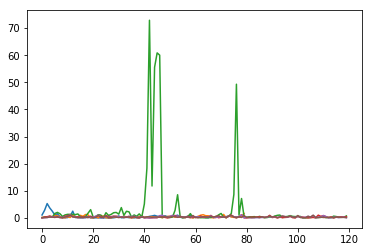

In [139]:
fdiff = []
labs = []
fstd = []
plt.figure()
for d in dirs:
    files = [fi for fi in os.listdir(d) if '.png' not in fi if 'class' not in fi]
    files.sort()
    if len(files)>1:
        f = files[-1]
        with open(d + '/' + f,"rb") as pickle_in:
            trace_a, trace_b, trace_x, trace_f1,trace_f2, trace_beta = pickle.load(pickle_in)
        with open(class_file,"rb") as spl_in:
            spl = pickle.load(spl_in)
        if d.split('_')[-1] == 'True':
            f1_0 = [ff[0] for ff in trace_f1[500:]]
            f2_0 = [ff[0] for ff in trace_f2[500:]]

            f1_1 = [ff[1] for ff in trace_f1[500:]]
            f2_1 = [ff[1] for ff in trace_f2[500:]]

            arr0 = np.array([abs(ff1 - ff2) for ff1 in f1_0 for ff2 in f2_0])
            arr1 = np.array([abs(ff1 - ff2) for ff1 in f1_0 for ff2 in f2_0])
            
            diff0 = np.mean(arr0,0)
            diff1 = np.mean(arr1,0)
            
            std0 = np.std(arr0)
            std1 = np.std(arr1)
            
            diff_tot = (diff0 + diff1)/2
            std_tot = (std0 +std1)/2
            
            diff_tot2 = np.sum(diff_tot)
            fdiff.append(diff_tot2)
            fstd.append(std_tot)
            labs.append(d)
            plt.plot(diff_tot, label = d.split('_')[3])

([<matplotlib.axis.XTick at 0x12b6b79e8>,
 <a list of 6 Text xticklabel objects>)

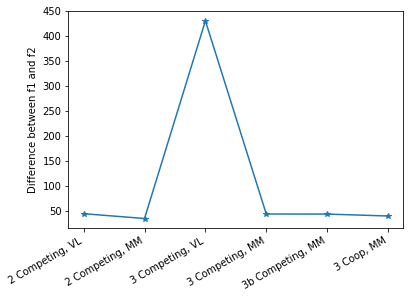

In [138]:
plt.plot(fdiff,'*-')
plt.ylabel('Difference between f1 and f2')
labs = ['2 Competing, VL', '2 Competing, MM', '3 Competing, VL','3 Competing, MM','3b Competing, MM','3 Coop, MM']
plt.xticks(range(6), labs,rotation=30, ha='right')

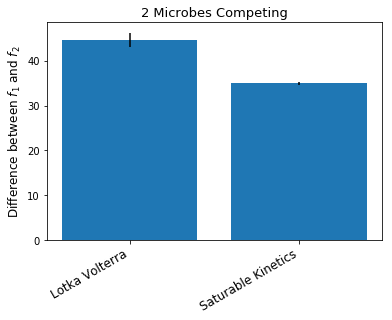

In [160]:
plt.bar([0,1], fdiff[:2], yerr = fstd[:2])
labs = ['Lotka Volterra', 'Saturable Kinetics']
plt.xticks([0,1],labs,rotation=30, ha='right', fontsize = 12)
plt.ylabel('Difference between $f_{1}$ and $f_{2}$', fontsize = 12)
plt.title('2 Microbes Competing',fontsize = 13)
plt.savefig('comp2summary.png')

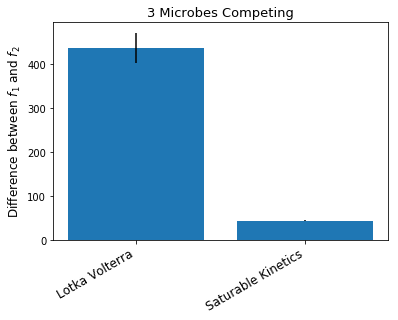

In [164]:
plt.bar([0,1], [fdiff[2], fdiff[3]], yerr = [fstd[2], fstd[3]])
labs = ['Lotka Volterra', 'Saturable Kinetics']
plt.xticks([0,1],labs,rotation=30, ha='right', fontsize = 12)
plt.ylabel('Difference between $f_{1}$ and $f_{2}$', fontsize = 12)
plt.title('3 Microbes Competing',fontsize = 13)
plt.savefig('comp3summary.png')

In [121]:
dirs = [d for d in os.listdir() if d.startswith('outdir_') if '.' not in d if 'class' not in d]

classes = [d for d in os.listdir() if d.startswith('outdir_') if '.' not in d if 'class' in d]
dirs.sort()
classes.sort()

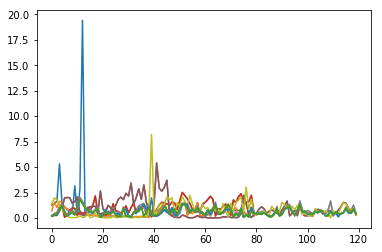

In [170]:
fdiff = []
labs = []
fstd = []
plt.figure()
for i,d in enumerate(dirs):
    files = [fi for fi in os.listdir(d) if '.png' not in fi if 'class' not in fi]
    files.sort()
    if len(files)>1:
        class_file = classes[i]
        f = files[-1]
        with open(d + '/' + f,"rb") as pickle_in:
            trace_a, trace_b, trace_x, trace_f1,trace_f2, trace_beta = pickle.load(pickle_in)
        with open(class_file,"rb") as spl_in:
            spl = pickle.load(spl_in)
            
        f1_0 = [ff[0] for ff in trace_f1]

        f1_1 = [ff[1] for ff in trace_f1]
        
        diff0 = np.mean(np.array([abs(spl.states[1:,:,0].flatten(order='F') - ff2) for ff2 in f1_0]),0)
        diff1 = np.mean(np.array([abs(spl.states[1:,:,0].flatten(order='F') - ff2) for ff2 in f1_1]),0)

        diff_tot = (diff0 + diff1)/2
        
        std0 = np.std(arr0)
        std1 = np.std(arr1)

        diff_tot = (diff0 + diff1)/2
        std_tot = (std0 +std1)/2

        diff_tot2 = np.sum(diff_tot)
        fdiff.append(diff_tot2)
        fstd.append(std_tot)
        labs.append(d)
        plt.plot(diff_tot, label = d.split('_')[3])

([<matplotlib.axis.XTick at 0x133f6bdd8>,
 <a list of 13 Text xticklabel objects>)

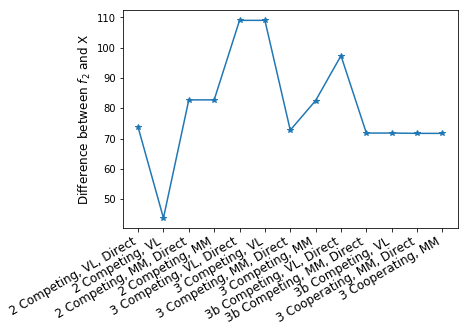

In [134]:
plt.plot(fdiff,'*-')
plt.ylabel(r'Difference between $f_{2}$ and X',fontsize = 12)
labs = ['2 Competing, VL, Direct', '2 Competing, VL', '2 Competing, MM, Direct', '2 Competing, MM',\
        '3 Competing, VL, Direct','3 Competing, VL','3 Competing, MM, Direct','3 Competing, MM',\
        '3b Competing, VL, Direct','3b Competing, MM, Direct','3b Competing, VL','3 Cooperating, MM, Direct','3 Cooperating, MM']
plt.xticks(range(len(labs)), labs,rotation=30, ha='right', fontsize = 12)

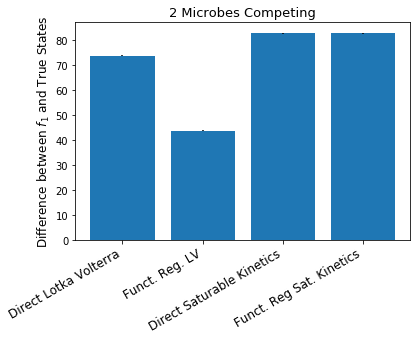

In [171]:
plt.bar([0,1,2,3], [fdiff[0], fdiff[1], fdiff[2], fdiff[3]], yerr = [fstd[0], fstd[1],fstd[2], fstd[3]])
labs = ['Direct Lotka Volterra', 'Funct. Reg. LV', 'Direct Saturable Kinetics', 'Funct. Reg Sat. Kinetics']
plt.xticks([0,1,2,3],labs,rotation=30, ha='right', fontsize = 12)
plt.ylabel('Difference between $f_{1}$ and True States', fontsize = 12)
plt.title('2 Microbes Competing',fontsize = 13)
plt.savefig('comp2summary_2.png')

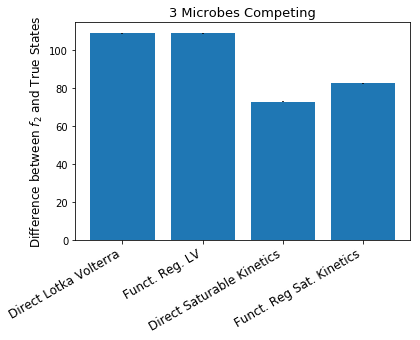

In [173]:
plt.bar([0,1,2,3], [fdiff[4], fdiff[5], fdiff[6], fdiff[7]], yerr = [fstd[4], fstd[5],fstd[6], fstd[7]])
labs = ['Direct Lotka Volterra', 'Funct. Reg. LV', 'Direct Saturable Kinetics', 'Funct. Reg Sat. Kinetics']
plt.xticks([0,1,2,3],labs,rotation=30, ha='right', fontsize = 12)
plt.ylabel('Difference between $f_{2}$ and True States', fontsize = 12)
plt.title('3 Microbes Competing',fontsize = 13)
plt.savefig('comp3summary_2.png')

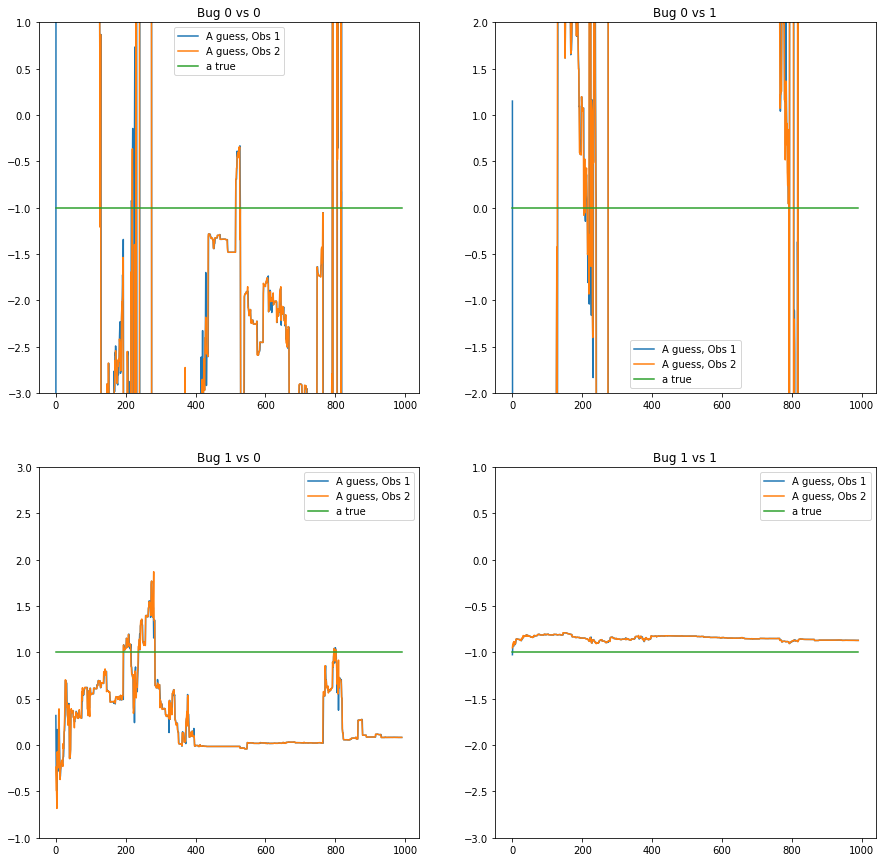

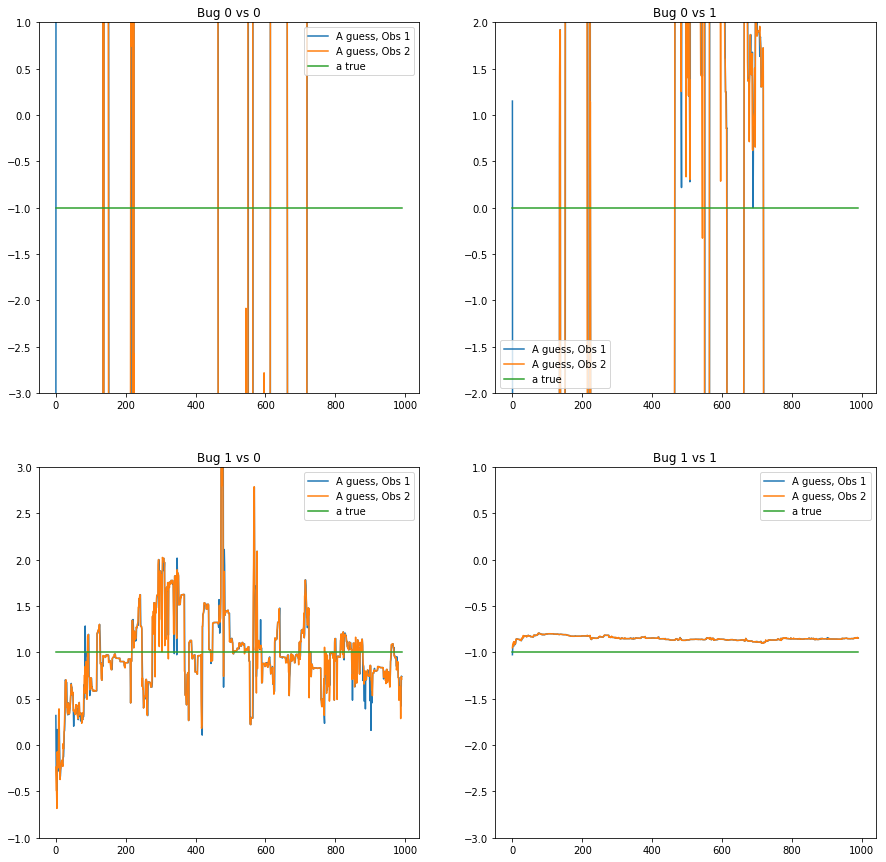

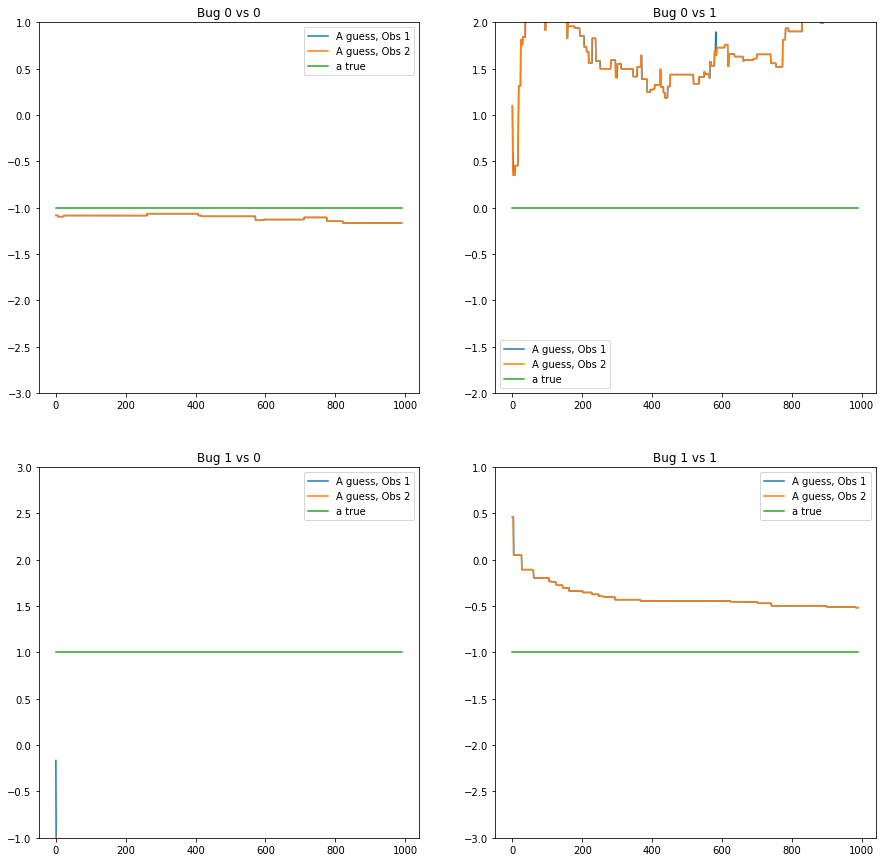

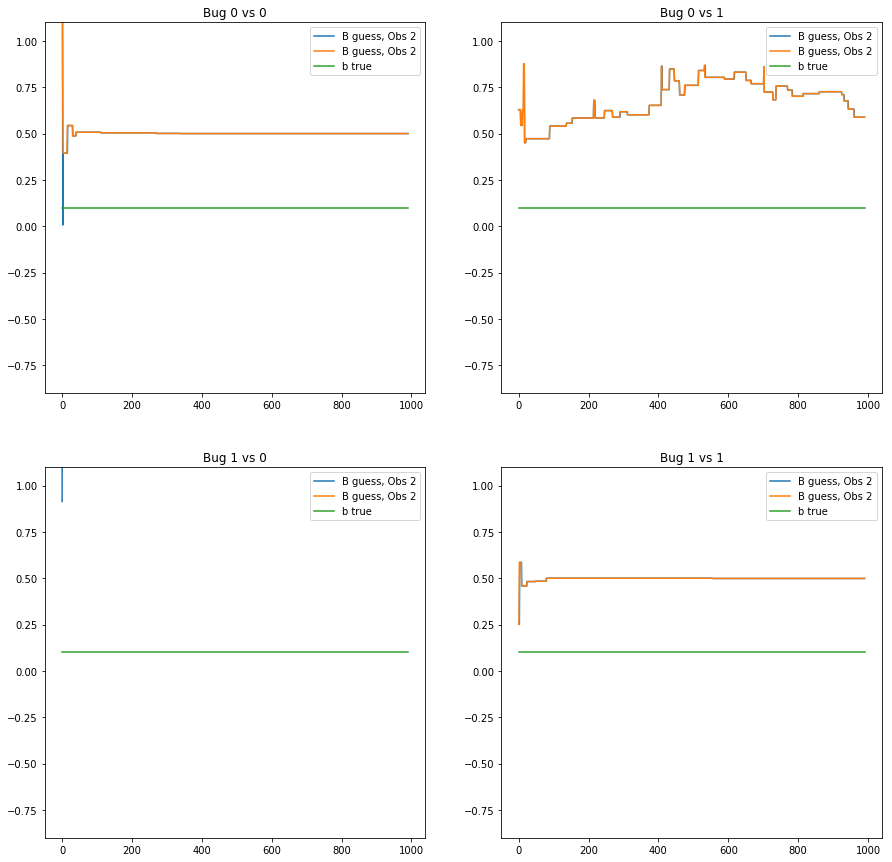

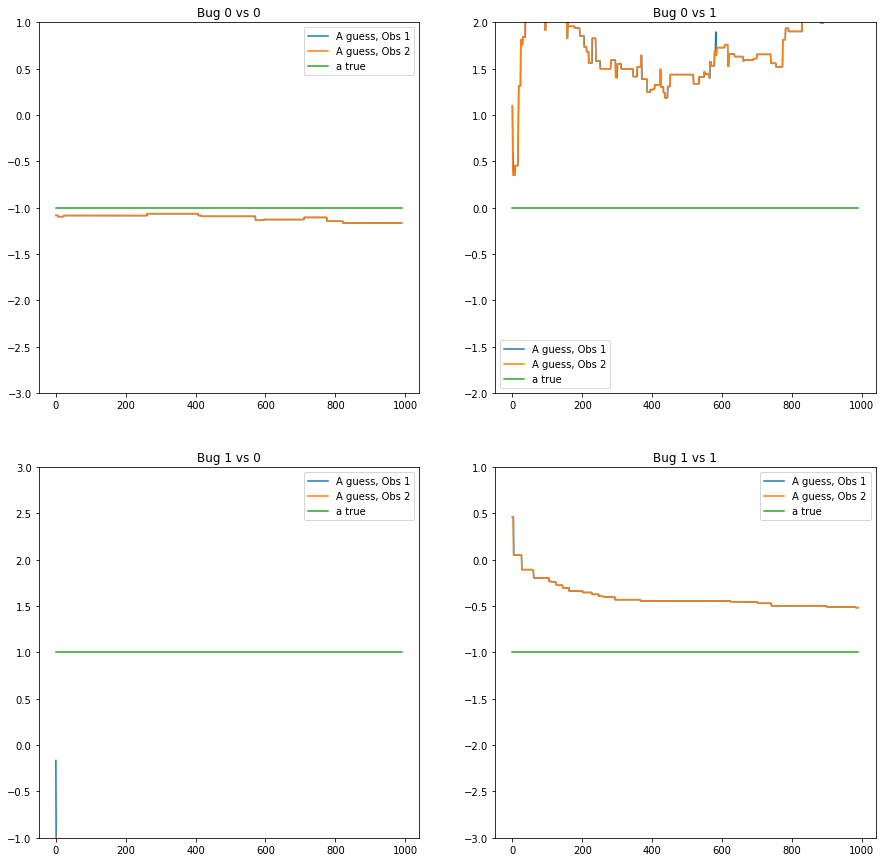

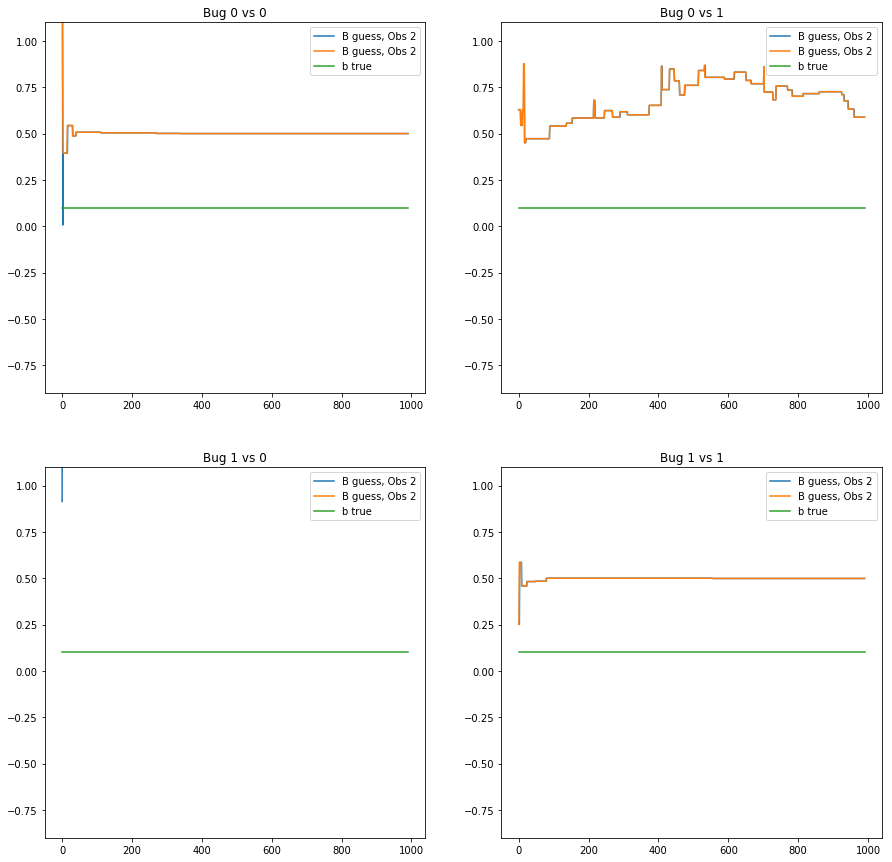

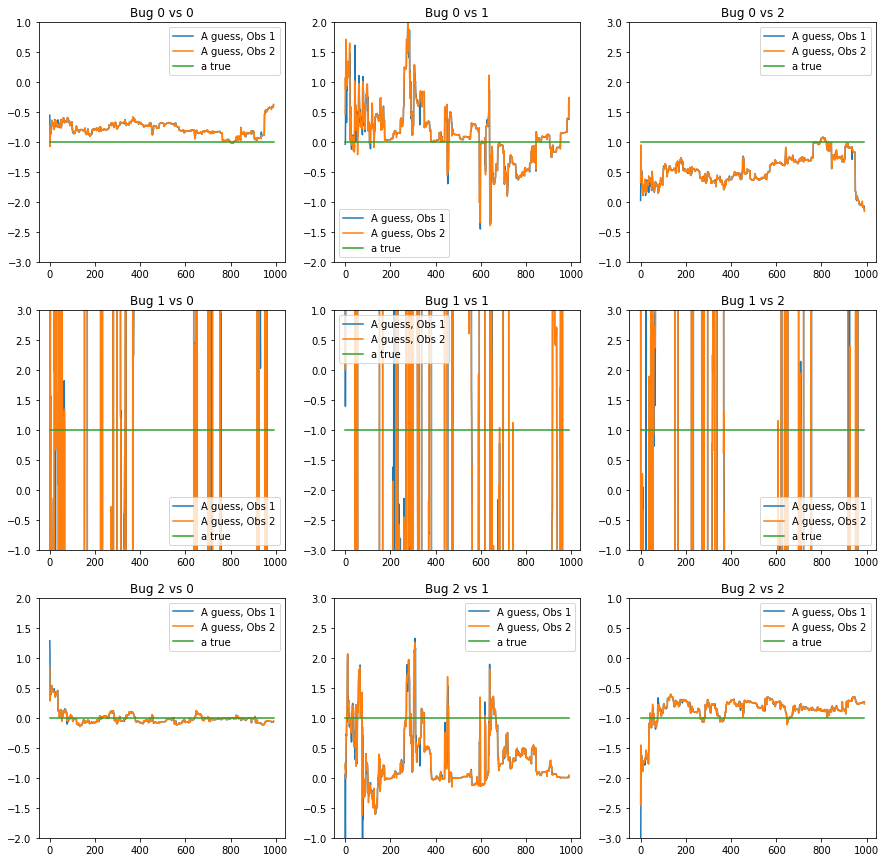

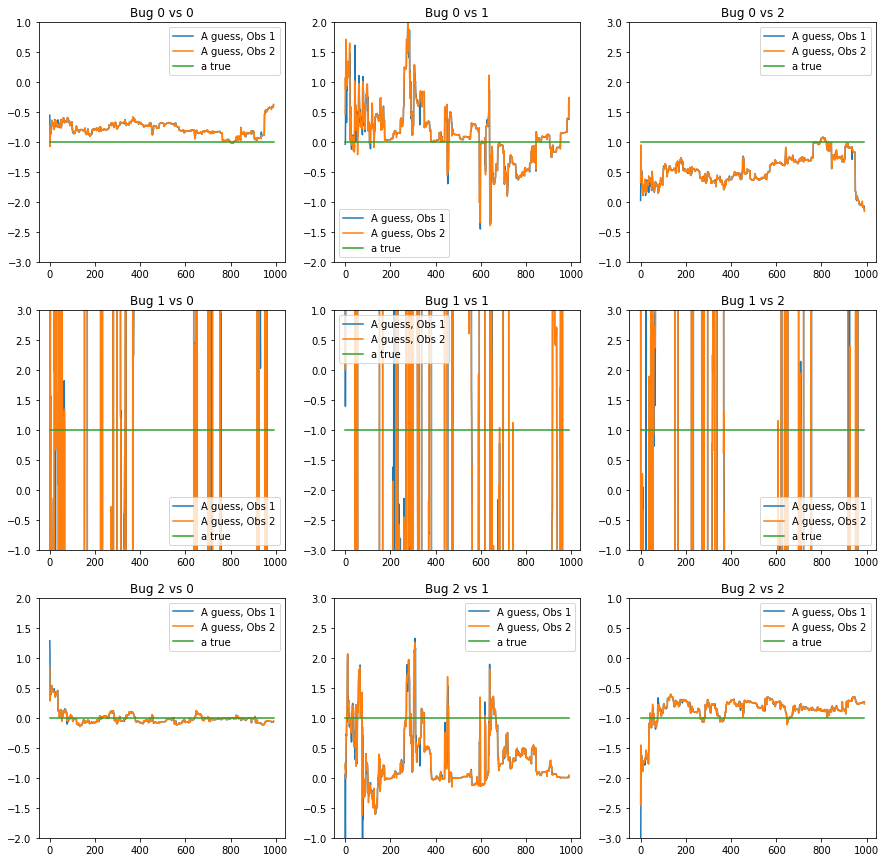

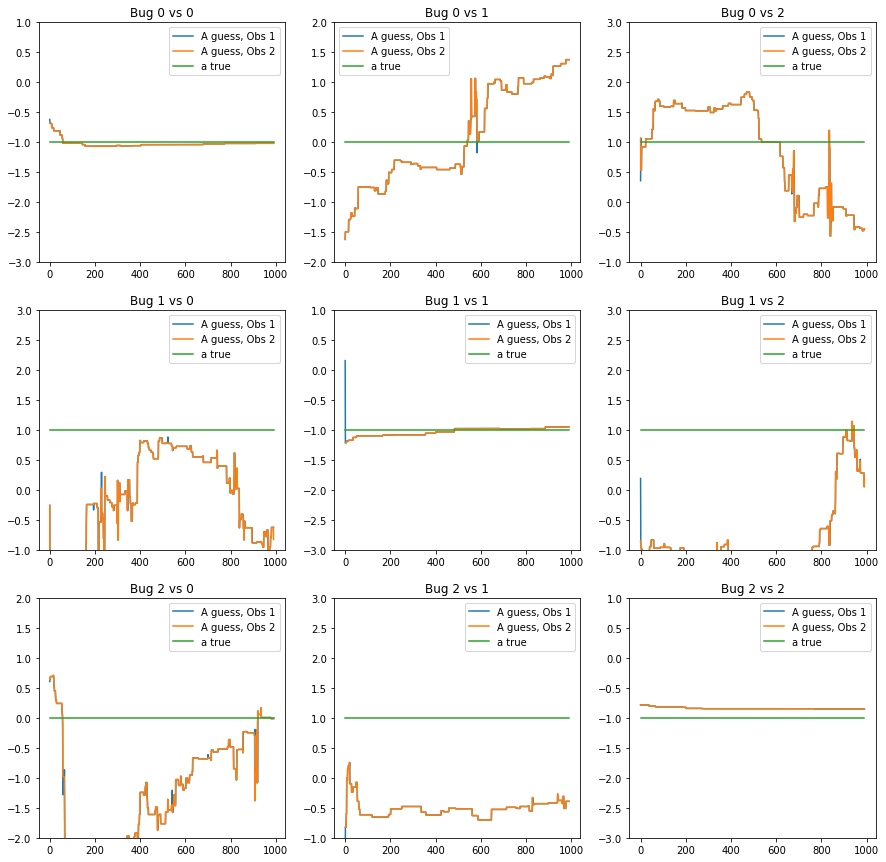

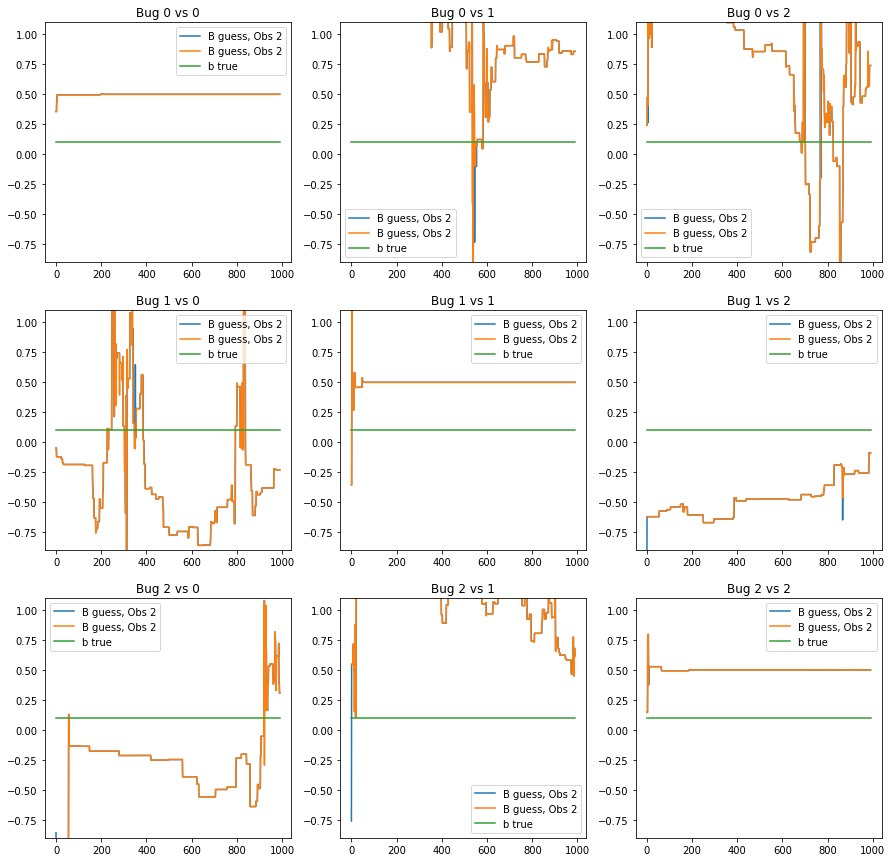

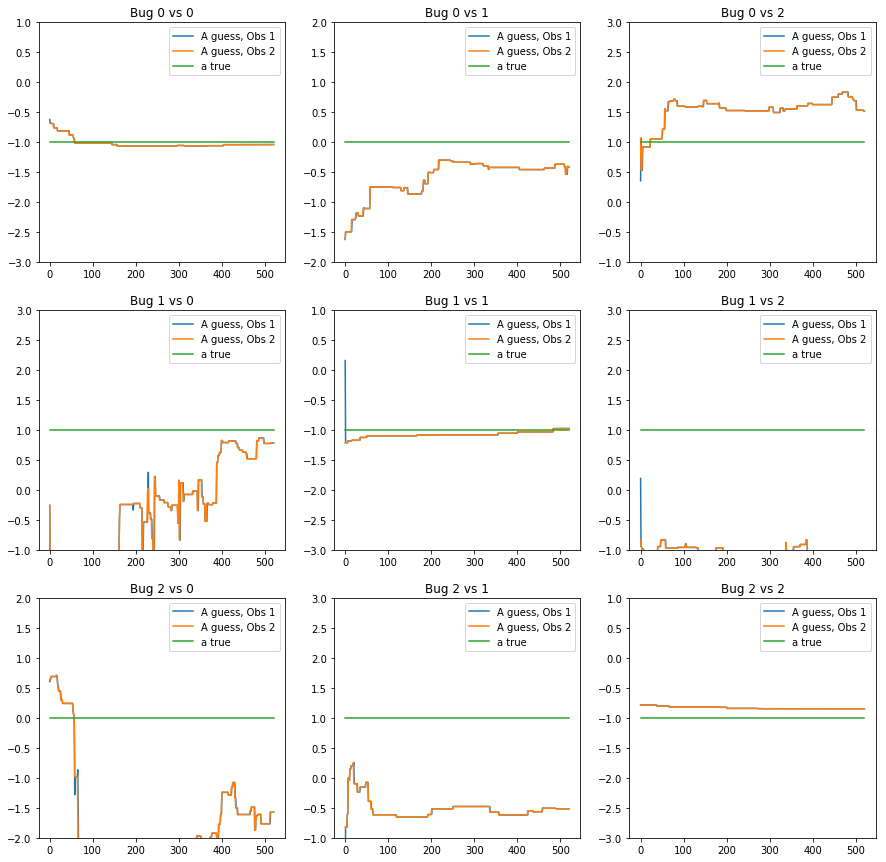

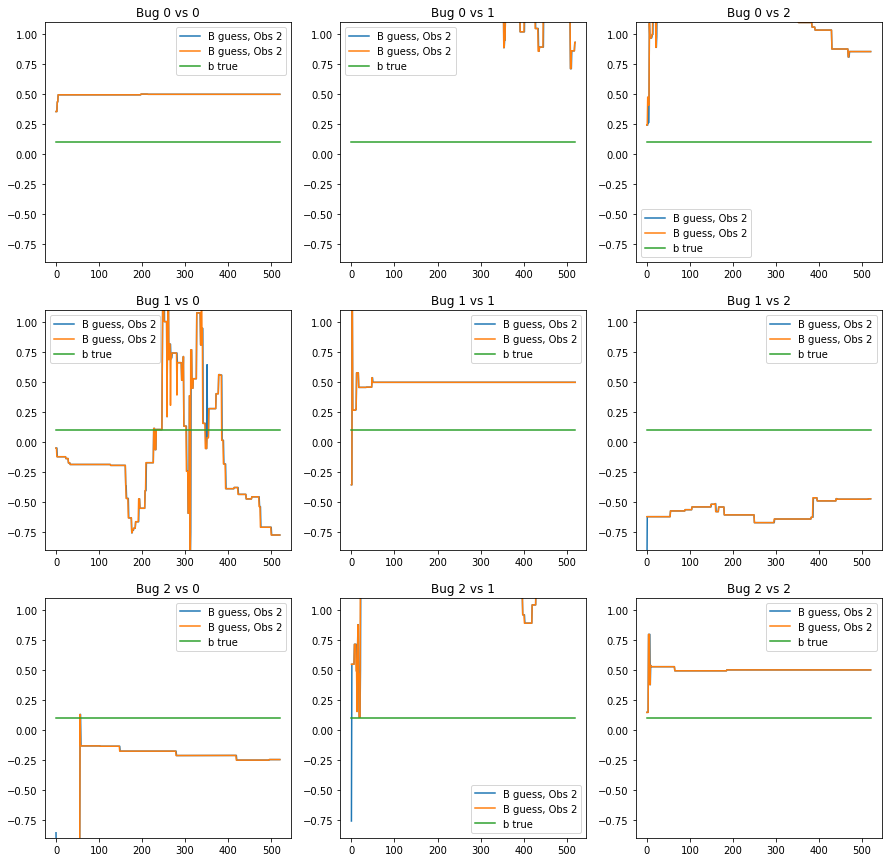

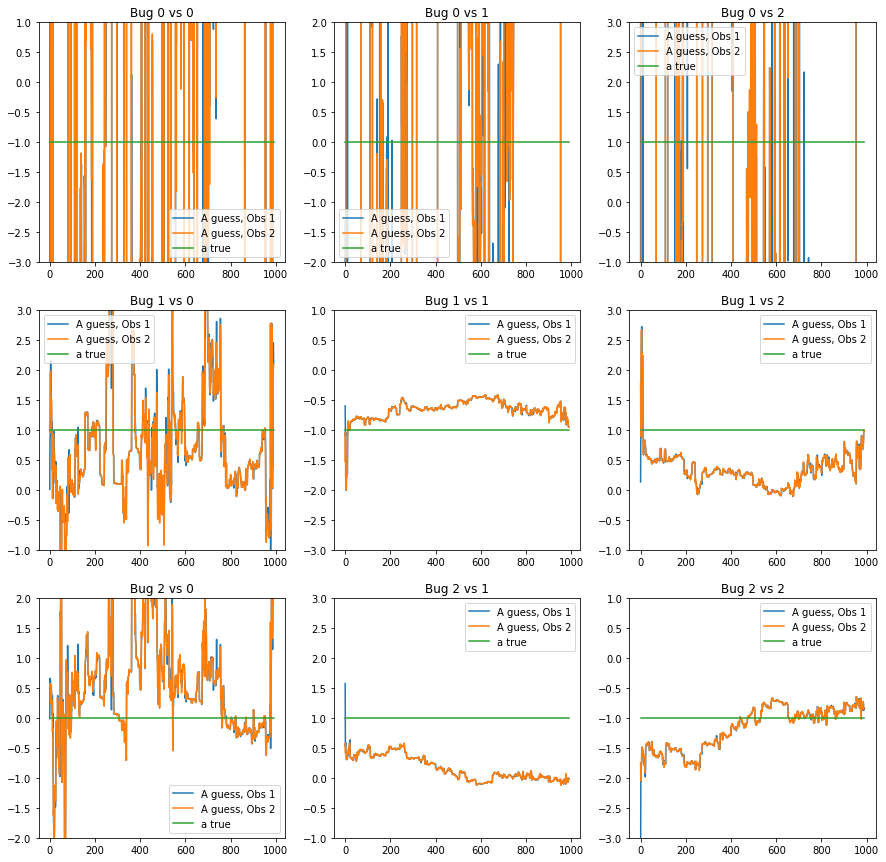

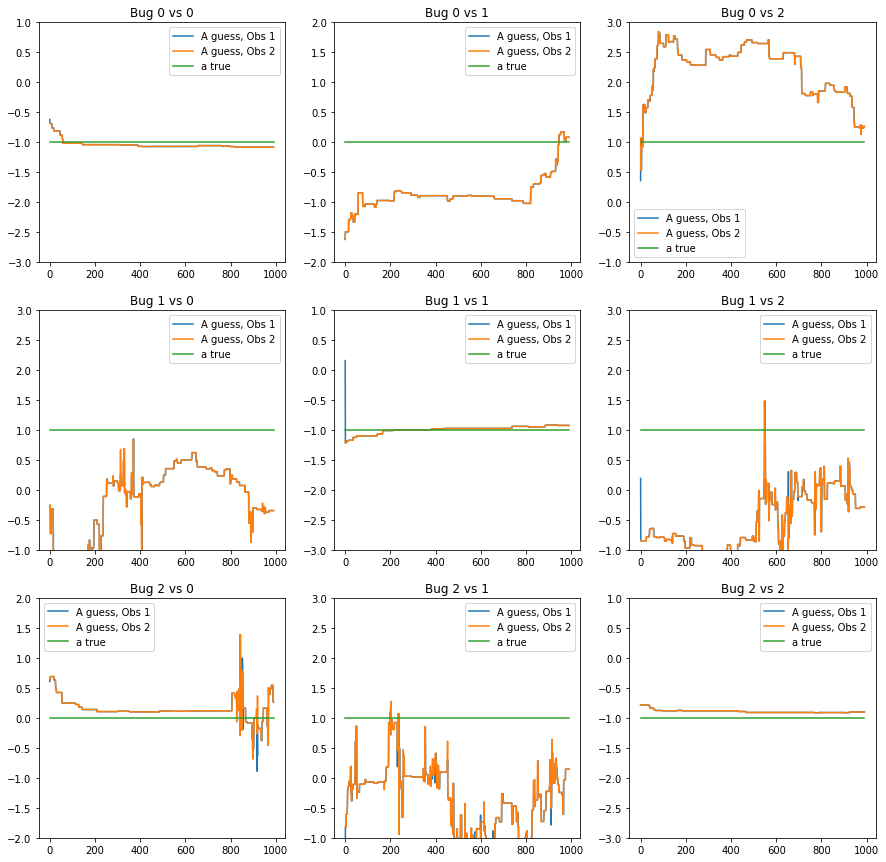

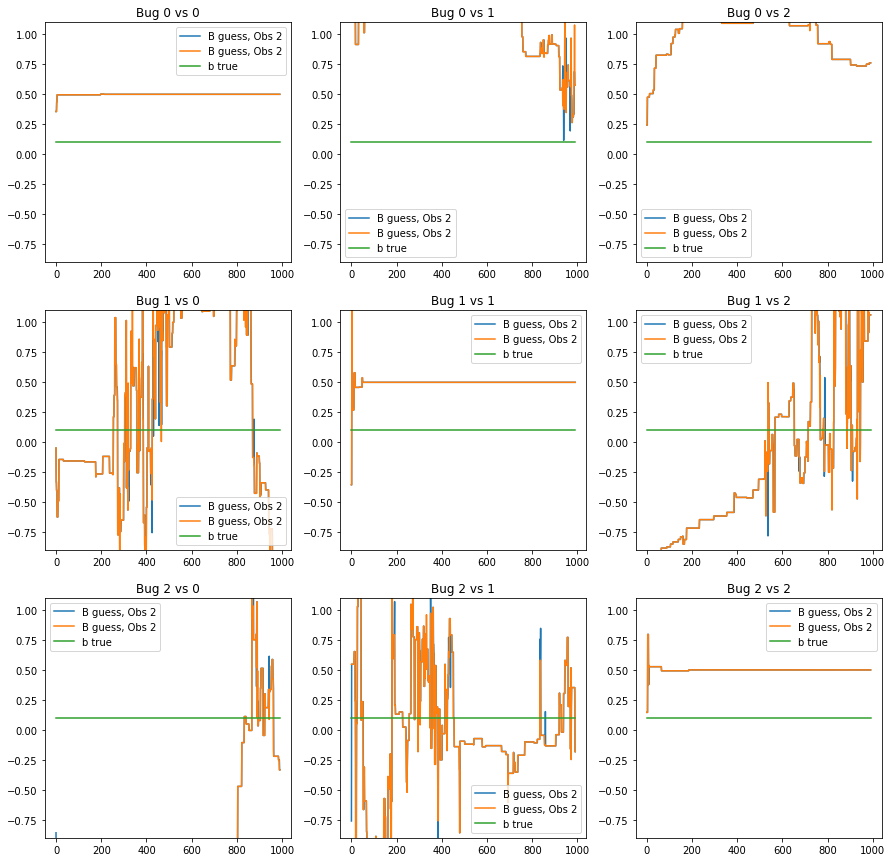

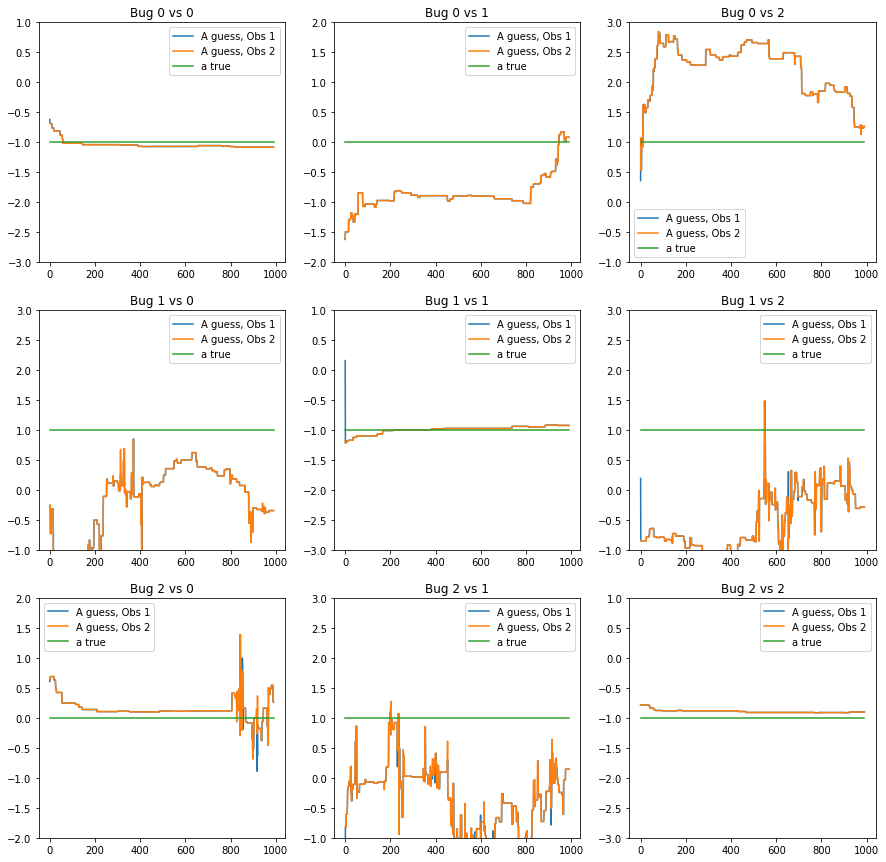

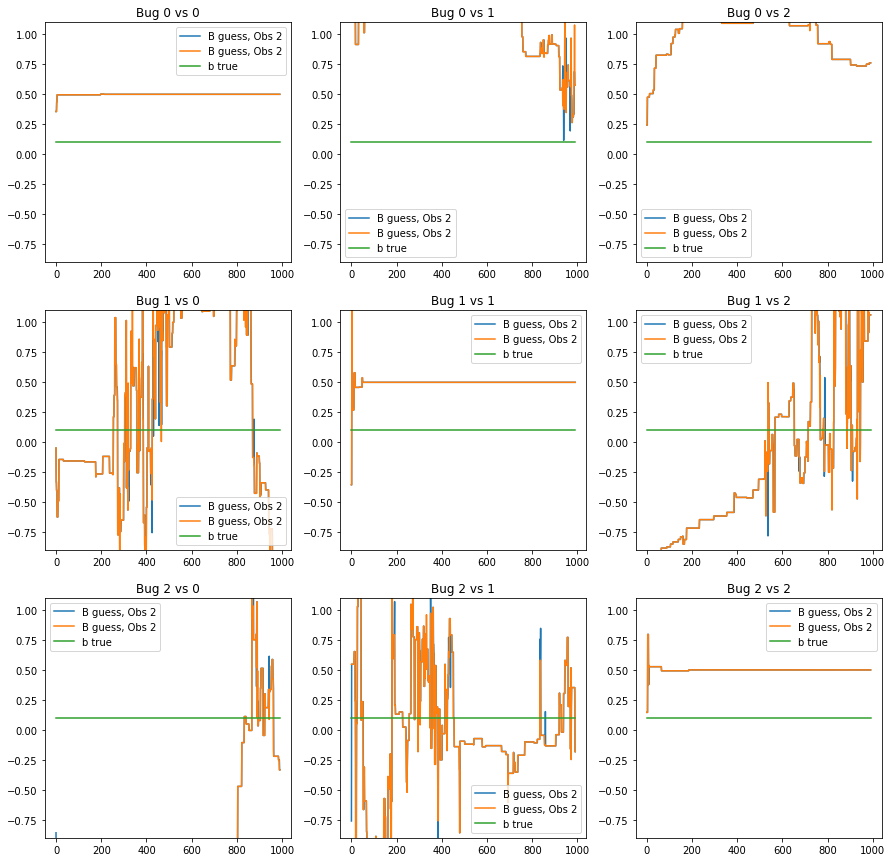

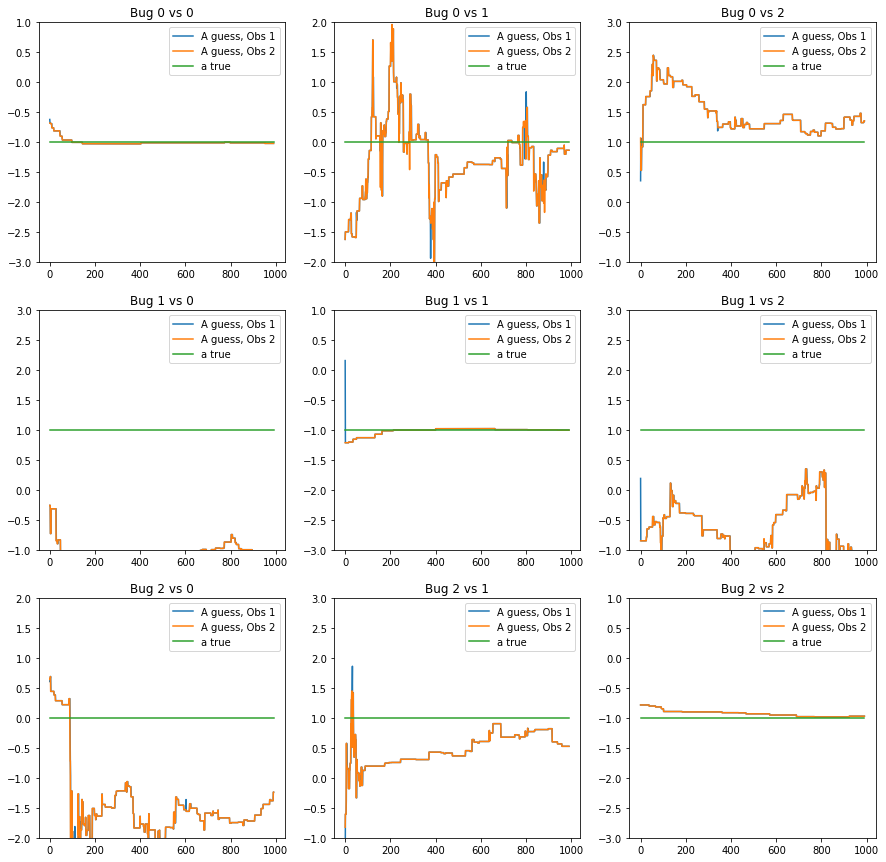

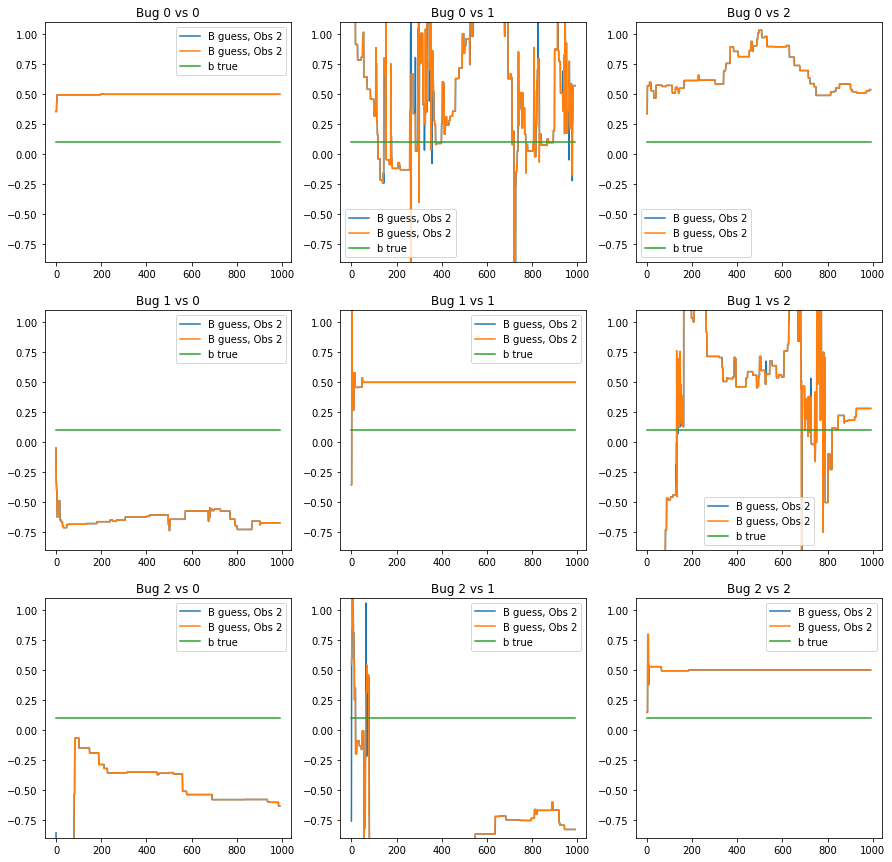

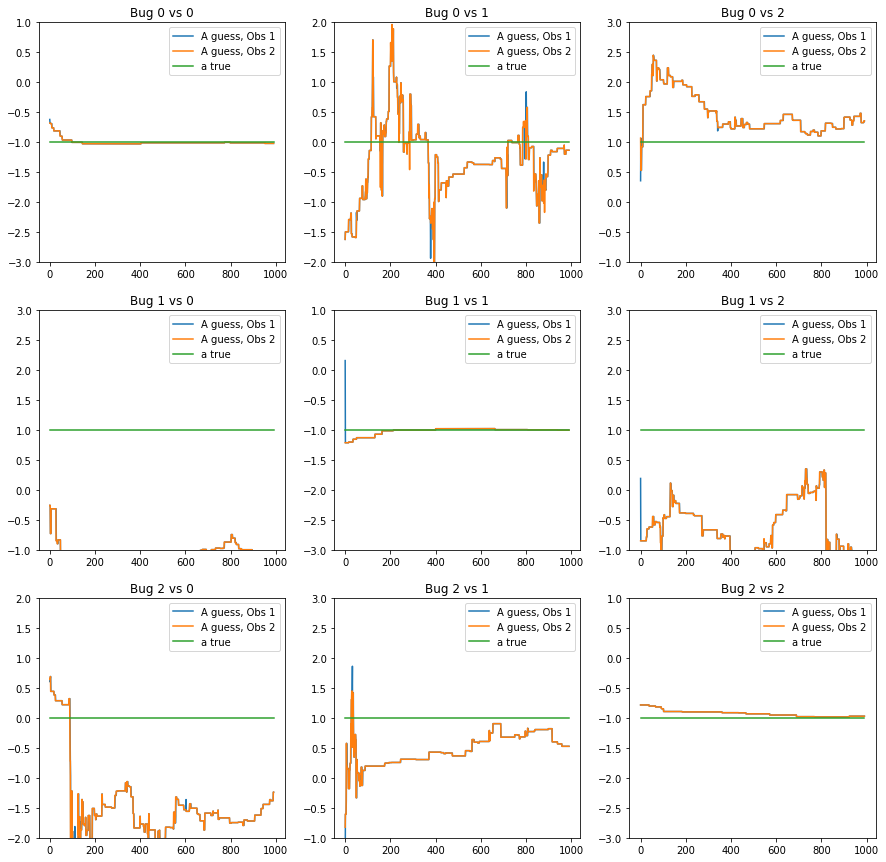

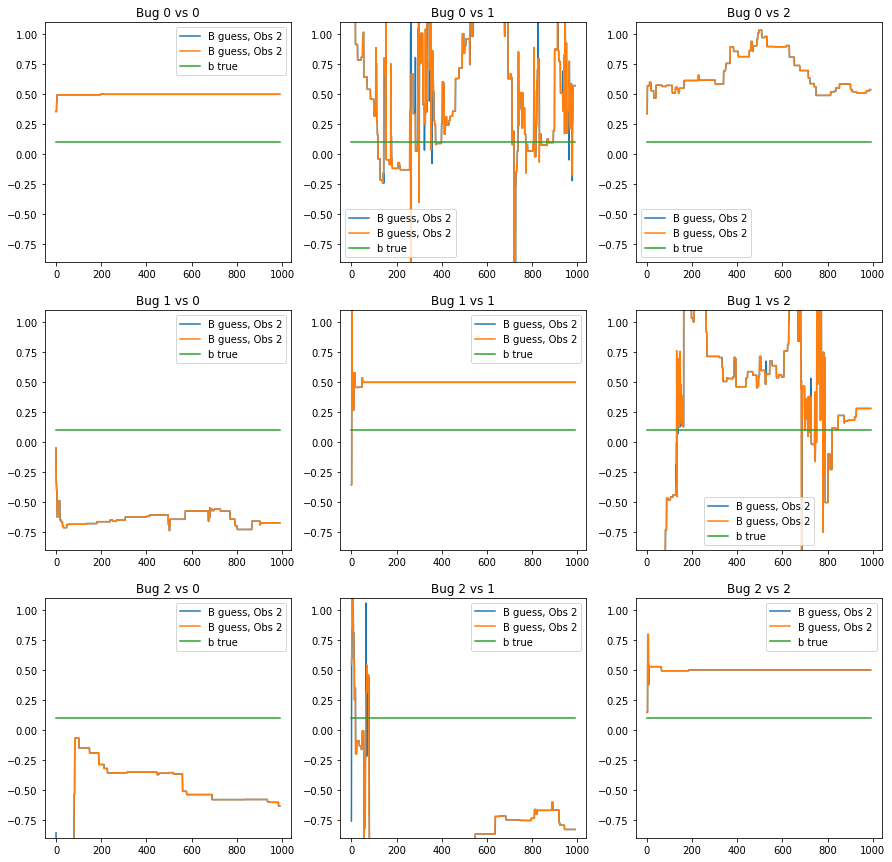

In [174]:
for d in dirs:
    files = [fi for fi in os.listdir(d) if '.png' not in fi if 'class' not in fi]
    files.sort()
    if len(files)>1:
        f = files[-1]
    #     for f in files:
        with open(d + '/' + f,"rb") as pickle_in:
            trace_a, trace_b, trace_x, trace_f1,trace_f2, trace_beta = pickle.load(pickle_in)
        with open(class_file,"rb") as spl_in:
            spl = pickle.load(spl_in)
        use_mm = not (trace_b[0][0] == 1).all()

        num_bugs = trace_a[0][0].shape[0]
        fig1, axes1 = plt.subplots(num_bugs, num_bugs, figsize=(15, 15))
        if use_mm:
            fig2, axes2 = plt.subplots(
                num_bugs, num_bugs, figsize=(15, 15))

        
        for bi in range(num_bugs):
            for bj in range(num_bugs):
                lab = 'Bug ' + str(bi) + ' vs ' + str(bj)
                a1 = [a[0][bi,bj] for a in trace_a]
                a2 = [a[1][bi,bj] for a in trace_a]
                axes1[bi,bj].plot(a1,label = 'A guess, Obs 1')
                axes1[bi, bj].plot(a2, label='A guess, Obs 2')
                axes1[bi, bj].plot(spl.true_a[bi,bj]*np.ones(len(a1)), label='a true')
                axes1[bi,bj].set_ylim([spl.true_a[bi,bj]-2,spl.true_a[bi,bj]+2])
                axes1[bi, bj].legend()
                axes1[bi, bj].set_title(lab)
                if use_mm:
                    b1 = [a[0][bi,bj] for a in trace_b]
                    b2 = [a[1][bi,bj] for a in trace_b]
                    axes2[bi,bj].plot(b1, label='B guess, Obs 2')
                    axes2[bi, bj].plot(b2, label='B guess, Obs 2')
                    axes2[bi, bj].plot(
                        spl.true_b[bi, bj]*np.ones(len(b1)), label='b true')
                    axes2[bi, bj].set_ylim(
                        [spl.true_b[bi, bj]-1, spl.true_b[bi, bj]+1])

                    axes2[bi, bj].legend()
                    axes2[bi, bj].set_title(lab)
        fig1.savefig(d + '_trace_a.png')
        fig1.show()
        if use_mm:
            fig2.savefig(d + '_trace_b.png')
            fig2.show()


In [26]:
pickle_in = open(dirs[0] + '/' + files[-1],"rb")

In [27]:
trace_a, trace_b, trace_x, trace_f1,trace_f2, trace_beta = pickle.load(pickle_in)

In [35]:
(trace_b[0][0] == 1).all()

True

In [39]:
label = d.split('_')[3]

In [40]:
label

'cooperation3'